In [1]:
import numpy as np
import pandas as pd

#pip install missingno
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

import datetime
from dateutil.relativedelta import relativedelta
from datetime import date

# To show full coulumns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Loading Data files
df1 = pd.read_excel("D:/HR Project (1)/staff utlz latest 16-17_masked.xlsx", header = 1)
df2 = pd.read_excel("D:/HR Project (1)/staff utlz latest 17-18_masked.xlsx", header = 1)

# Termination File
dft = pd.read_excel("D:/HR Project (1)/Terminations 15-18.xlsx")

In [3]:
df1.head()

,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Current Status,Termination Date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Total Hours.1,Total Available Hours.1,Work Hours.1,Leave Hours.1,Training Hours.1,BD Hours.1,NC Hours.1,Utilization%.1,Total Hours.2,Total Available Hours.2,Work Hours.2,Leave Hours.2,Training Hours.2,BD Hours.2,NC Hours.2,Utilization%.2,Total Hours.3,Total Available Hours.3,Work Hours.3,Leave Hours.3,Training Hours.3,BD Hours.3,NC Hours.3,Utilization%.3,Total Hours.4,Total Available Hours.4,Work Hours.4,Leave Hours.4,Training Hours.4,BD Hours.4,NC Hours.4,Utilization%.4,Total Hours.5,Total Available Hours.5,Work Hours.5,Leave Hours.5,Training Hours.5,BD Hours.5,NC Hours.5,Utilization%.5,Total Hours.6,Total Available Hours.6,Work Hours.6,Leave Hours.6,Training Hours.6,BD Hours.6,NC Hours.6,Utilization%.6,Total Hours.7,Total Available Hours.7,Work Hours.7,Leave Hours.7,Training Hours.7,BD Hours.7,NC Hours.7,Utilization%.7,Total Hours.8,Total Available Hours.8,Work Hours.8,Leave Hours.8,Training Hours.8,BD Hours.8,NC Hours.8,Utilization%.8,Total Hours.9,Total Available Hours.9,Work Hours.9,Leave Hours.9,Training Hours.9,BD Hours.9,NC Hours.9,Utilization%.9,Total Hours.10,Total Available Hours.10,Work Hours.10,Leave Hours.10,Training Hours.10,BD Hours.10,NC Hours.10,Utilization%.10,Total Hours.11,Total Available Hours.11,Work Hours.11,Leave Hours.11,Training Hours.11,BD Hours.11,NC Hours.11,Utilization%.11,Total Hours.12,Total Available Hours.12,Work Hours.12,Leave Hours.12,Training Hours.12,BD Hours.12,NC Hours.12,Utilization%.12
0,1,PC - 1,Rochette Jilleen,Level 2,Location 3,Client Service Staff,Level 1/2,Idalina Lauraine,2000-09-30,Active,-,168,160,55,8,0,102,0,0.34375,176,168,32,8,0,168,8,0.190476,176,152,12,24,0,44,0,0.078947,168,134,69,32,2,153,24,0.514925,184,168,20,16,0,84,0,0.119048,176,116,65,28,32,123,0,0.560345,168,150,53,12,6,91,0,0.353333,176,152,37,24,0,59,0,0.243421,176,136,84,40,0,126,0,0.617647,176,144,68,8,24,67,0,0.472222,160,147,49,8,5,114,0,0.333333,184,175,92,8,1,61,24,0.525714,2088,1802.0,636.0,216.0,70.0,1192.0,56.0,0.352941
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,1999-05-31,Active,-,168,152,54,8,8,44,74,0.355263,176,152,24,24,0,65,67,0.157895,176,172,86,4,0,47,50,0.5,168,144,27,8,16,63,79,0.1875,184,168,34,16,0,68,70,0.202381,176,138,26,12,26,61,66.5,0.188406,168,160,11,8,0,87,66,0.06875,176,160,28,16,0,70,73,0.175,176,136,54,40,0,41,41,0.397059,176,164,29,12,0,67,70,0.176829,160,152,0,8,0,76,76,0,184,184,182.5,0,0,5,1.5,0.991848,2088,1882.0,555.5,156.0,50.0,694.0,734.0,0.295165
2,3,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,2001-01-31,Active,-,168,144,59,16,8,43,60,0.409722,176,184,52.5,-8,0,69.5,62,0.285326,176,168,43,8,0,61,64,0.255952,168,167,85,0,1,30.5,61.5,0.508982,184,160,119,24,0,34,34,0.74375,176,152,40.5,0,24,55.5,67,0.266447,168,152,62.5,8,8,43,40.5,0.411184,176,157.5,48,16,2.5,64,54.5,0.304762,176,136,124,40,0,8,16,0.911765,176,152,93.5,24,0,49,26.5,0.615132,160,152,57.5,8,0,52,49.5,0.378289,184,174,220,8,2,-2.5,14,1.264368,2088,1898.5,1004.5,144.0,45.5,507.0,549.5,0.529102
3,4,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Level 1/2,Idalina Lauraine,2000-09-30,Active,-,168,152,17,16,0,127,8,0.111842,176,160,21,0,16,115,8,0.13125,176,176,27,0,0,141,24,0.153409,168,151.5,52,10,6.5,91.5,38,0.343234,184,152,19,32,0,117,16,0.125,176,118,9,54,4,59,58,0.076271,168,152,5,16,0,139,8,0.032895,176,160,11,16,0,93,40,0.06875,176,136,2,40,0,158,0,0.014706,176,159.5,24,16,0.5,122.5,0,0.15047,160,158,33,0,2,102,39,0.208861,184,176,53,8,0,117,16,0.301136,2088,1851.0,273.0,208.0,29.0,1382.0,255.0,0.147488
4,5,PC - 4,Idalina Lauraine,Level 1,Location 3,Client Service Staff,Level 1/2,Abagail Druci,1998-06-30,Active,-,168,168,4,0,0,117

In [4]:
df2.head()

,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Current Status,Termination Date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Total Hours.1,Total Available Hours.1,Work Hours.1,Leave Hours.1,Training Hours.1,BD Hours.1,NC Hours.1,Utilization%.1,Total Hours.2,Total Available Hours.2,Work Hours.2,Leave Hours.2,Training Hours.2,BD Hours.2,NC Hours.2,Utilization%.2,Total Hours.3,Total Available Hours.3,Work Hours.3,Leave Hours.3,Training Hours.3,BD Hours.3,NC Hours.3,Utilization%.3,Total Hours.4,Total Available Hours.4,Work Hours.4,Leave Hours.4,Training Hours.4,BD Hours.4,NC Hours.4,Utilization%.4,Total Hours.5,Total Available Hours.5,Work Hours.5,Leave Hours.5,Training Hours.5,BD Hours.5,NC Hours.5,Utilization%.5,Total Hours.6,Total Available Hours.6,Work Hours.6,Leave Hours.6,Training Hours.6,BD Hours.6,NC Hours.6,Utilization%.6,Total Hours.7,Total Available Hours.7,Work Hours.7,Leave Hours.7,Training Hours.7,BD Hours.7,NC Hours.7,Utilization%.7,Total Hours.8,Total Available Hours.8,Work Hours.8,Leave Hours.8,Training Hours.8,BD Hours.8,NC Hours.8,Utilization%.8,Total Hours.9,Total Available Hours.9,Work Hours.9,Leave Hours.9,Training Hours.9,BD Hours.9,NC Hours.9,Utilization%.9,Total Hours.10,Total Available Hours.10,Work Hours.10,Leave Hours.10,Training Hours.10,BD Hours.10,NC Hours.10,Utilization%.10,Total Hours.11,Total Available Hours.11,Work Hours.11,Leave Hours.11,Training Hours.11,BD Hours.11,NC Hours.11,Utilization%.11,Total Hours.12,Total Available Hours.12,Work Hours.12,Leave Hours.12,Training Hours.12,BD Hours.12,NC Hours.12,Utilization%.12
0,1,PC - 1,Rochette Jilleen,Level 1,Location 3,Client Service Staff,SVP/VP,Idalina Lauraine,2000-09-30,Active,NaT,160,144,52,16,0,95,0,0.361111,184,176,46,8,0,130,0,0.261364,176,156,27,20,0,127,0,0.173077,168,168,29,0,0,115,16,0.172619,184,165,27,16,3,77,0,0.163636,168,152,71,16,0,172,0,0.467105,176,136,30,40,0,106,0,0.220588,176,168,39,0,8,131,0,0.232143,168,111.5,24,40,16.5,95.5,0,0.215247,184,176,12,8,0,60,0,0.068182,160,152,62,8,0,192,2,0.407895,176,160,29,16,0,131,0,0.18125,2080,1864.5,448.0,188,27.5,1431.5,18.0,0.240279
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,1999-05-31,Active,NaT,160,152,31,8,0,64,61,0.203947,184,120,31,64,0,45,44,0.258333,176,168,49,8,0,62,60,0.291667,168,164,31,0,4,67,68,0.189024,184,160,19,24,0,71,71,0.11875,168,160,91.5,8,0,36,35.5,0.571875,176,152,59,24,0,43.5,50.5,0.388158,176,176,167,0,0,12,11,0.948864,168,128,149,40,0,-1,-5,1.164062,184,176,15,8,0,82,79,0.085227,160,152,38,8,0,57,65,0.25,176,160,41.5,16,0,62,56.5,0.259375,2080,1868.0,722.0,208,4.0,600.5,596.5,0.38651
2,3,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,2001-01-31,Active,NaT,160,152,47,8,0,65,60,0.309211,184,176,33,8,0,60,84,0.1875,176,168,83,8,0,35,52,0.494048,168,156,201,8,4,22,18,1.288462,184,176,21,8,0,85,74,0.119318,168,144,113,8,16,32,18,0.784722,176,78,96,98,0,4,-10,1.230769,176,138,139,36,2,19,19,1.007246,168,120,124.5,48,0,29,2,1.0375,184,152,86.5,32,0,47.5,27.5,0.569079,160,148,87,12,0,45,25,0.587838,176,112,142,64,0,20,-12,1.267857,2080,1720.0,1173.0,338,22.0,463.5,357.5,0.681977
3,4,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Resigned,Idalina Lauraine,2000-09-30,Resigned,2018-02-28,160,152,95,8,0,57,0,0.625,184,176,74.5,8,0,85.5,24,0.423295,176,160,2,16,0,158,0,0.0125,168,165,20,0,3,140,0,0.121212,184,168,6,16,0,170,0,0.035714,168,160,59.5,8,0,106,0,0.371875,176,144,8,32,0,136,0,0.055556,176,151.5,0,24,0.5,151.5,0,0,168,124,0,44,0,124,0,0,184,148,4,36,0,145,0,0.027027,96,92,4,4,0,88,0,0.043478,-,-,-,-,-,-,-,-,1840,1640.5,273.0,196,3.5,1361.0,24.0,0.166413
4,6,PC - 1,Jordanna Danya,Level 2,Location 3,Client Service Staff,SVP/VP,Idalina Lauraine,2002-06-30,Active,NaT,160,152,46,8,0,120,16,0.302632,184,184,13,0,0,164,32,0.070652,1

In [5]:
dft.head()

,Employee Number,Employee Name,YEAR of Birth,Gender,Leaving Reason,Previous Employer,Last Update Date,Latest Available Rating,Emp Ref.
0,4,Barbee Joey,1975,M,Career Growth,kadoo,2018-02-27,NaN,NaN
1,8,Kakalina Lorry,1980,F,Career Growth,cynoid,2017-02-17,3.0,NaN
2,11,Aili Nessy,1982,M,Career Growth,NaN,2017-01-12,2.0,NaN
3,15,Peria Maryjo,1979,M,Career Growth,flimbo,2016-09-15,3.0,NaN
4,19,Cordey Sofia,1982,F,Employee Transfer,NaN,2018-04-26,NaN,NaN


In [6]:
print(df1.shape)
print('_'*20)
print(df2.shape)
print('_'*20)
print(dft.shape)

(789, 115)
____________________
(973, 115)
____________________
(293, 9)


## Removing Space from column names

In [7]:
df1.columns = df1.columns.str.replace(' ', '')
df2.columns = df2.columns.str.replace(' ', '')
dft.columns = dft.columns.str.replace(' ', '')

In [8]:
# Changing column name in dft dataframe
dft.rename(columns = {'EmployeeNumber':'EmployeeNo'}, inplace = True)

#### Before Proceesing we have to merge df1 and df2 datasets

#### on which we can perform our analysis

In [9]:
data = df2.append(df1, ignore_index=True)

In [10]:
data.head()

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,EmployeeCategory,Supervisorname,JoinDate,CurrentStatus,TerminationDate,TotalHours,TotalAvailableHours,WorkHours,LeaveHours,TrainingHours,BDHours,NCHours,Utilization%,TotalHours.1,TotalAvailableHours.1,WorkHours.1,LeaveHours.1,TrainingHours.1,BDHours.1,NCHours.1,Utilization%.1,TotalHours.2,TotalAvailableHours.2,WorkHours.2,LeaveHours.2,TrainingHours.2,BDHours.2,NCHours.2,Utilization%.2,TotalHours.3,TotalAvailableHours.3,WorkHours.3,LeaveHours.3,TrainingHours.3,BDHours.3,NCHours.3,Utilization%.3,TotalHours.4,TotalAvailableHours.4,WorkHours.4,LeaveHours.4,TrainingHours.4,BDHours.4,NCHours.4,Utilization%.4,TotalHours.5,TotalAvailableHours.5,WorkHours.5,LeaveHours.5,TrainingHours.5,BDHours.5,NCHours.5,Utilization%.5,TotalHours.6,TotalAvailableHours.6,WorkHours.6,LeaveHours.6,TrainingHours.6,BDHours.6,NCHours.6,Utilization%.6,TotalHours.7,TotalAvailableHours.7,WorkHours.7,LeaveHours.7,TrainingHours.7,BDHours.7,NCHours.7,Utilization%.7,TotalHours.8,TotalAvailableHours.8,WorkHours.8,LeaveHours.8,TrainingHours.8,BDHours.8,NCHours.8,Utilization%.8,TotalHours.9,TotalAvailableHours.9,WorkHours.9,LeaveHours.9,TrainingHours.9,BDHours.9,NCHours.9,Utilization%.9,TotalHours.10,TotalAvailableHours.10,WorkHours.10,LeaveHours.10,TrainingHours.10,BDHours.10,NCHours.10,Utilization%.10,TotalHours.11,TotalAvailableHours.11,WorkHours.11,LeaveHours.11,TrainingHours.11,BDHours.11,NCHours.11,Utilization%.11,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12,Utilization%.12
0,1,PC - 1,Rochette Jilleen,Level 1,Location 3,Client Service Staff,SVP/VP,Idalina Lauraine,2000-09-30,Active,NaT,160,144,52,16,0,95,0,0.361111,184,176,46,8,0,130,0,0.261364,176,156,27,20,0,127,0,0.173077,168,168,29,0,0,115,16,0.172619,184,165,27,16,3,77,0,0.163636,168,152,71,16,0,172,0,0.467105,176,136,30,40,0,106,0,0.220588,176,168,39,0,8,131,0,0.232143,168,111.5,24,40,16.5,95.5,0,0.215247,184,176,12,8,0,60,0,0.068182,160,152,62,8,0,192,2,0.407895,176,160,29,16,0,131,0,0.18125,2080,1864.5,448.0,188.0,27.5,1431.5,18.0,0.240279
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,1999-05-31,Active,NaT,160,152,31,8,0,64,61,0.203947,184,120,31,64,0,45,44,0.258333,176,168,49,8,0,62,60,0.291667,168,164,31,0,4,67,68,0.189024,184,160,19,24,0,71,71,0.11875,168,160,91.5,8,0,36,35.5,0.571875,176,152,59,24,0,43.5,50.5,0.388158,176,176,167,0,0,12,11,0.948864,168,128,149,40,0,-1,-5,1.164062,184,176,15,8,0,82,79,0.085227,160,152,38,8,0,57,65,0.25,176,160,41.5,16,0,62,56.5,0.259375,2080,1868.0,722.0,208.0,4.0,600.5,596.5,0.38651
2,3,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,2001-01-31,Active,NaT,160,152,47,8,0,65,60,0.309211,184,176,33,8,0,60,84,0.1875,176,168,83,8,0,35,52,0.494048,168,156,201,8,4,22,18,1.288462,184,176,21,8,0,85,74,0.119318,168,144,113,8,16,32,18,0.784722,176,78,96,98,0,4,-10,1.230769,176,138,139,36,2,19,19,1.007246,168,120,124.5,48,0,29,2,1.0375,184,152,86.5,32,0,47.5,27.5,0.569079,160,148,87,12,0,45,25,0.587838,176,112,142,64,0,20,-12,1.267857,2080,1720.0,1173.0,338.0,22.0,463.5,357.5,0.681977
3,4,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Resigned,Idalina Lauraine,2000-09-30,Resigned,2018-02-28 00:00:00,160,152,95,8,0,57,0,0.625,184,176,74.5,8,0,85.5,24,0.423295,176,160,2,16,0,158,0,0.0125,168,165,20,0,3,140,0,0.121212,184,168,6,16,0,170,0,0.035714,168,160,59.5,8,0,106,0,0.371875,176,144,8,32,0,136,0,0.055556,176,151.5,0,24,0.5,151.5,0,0,168,124,0,44,0,124,0,0,184,148,4,36,0,145,0,0.027027,96,92,4,4,0,88,0,0.043478,-,-,-,-,-,-,-,-,1840,1640.5,273.0,196.0,3.5,1361.0,24.0,0.166413
4,6,PC - 1,Jordanna Danya,Level 2,Location 3,Client Service Staff,SVP/VP,Idalina Lauraine,2002-06-30,Active,NaT,160,152,46,8,0,120,16,0.302632,184,184,13,0,0,164,32,0.070652,176,160,28,16,0,115,22,0.175,168,160,52,8,0,82,50,0.325,184,168,84,16,0,134,8,0.5,168,152,69,8,8,12

In [11]:
data.duplicated(subset=['EmployeeNo']).sum()

651

In [12]:
data = data.drop_duplicates(subset=['EmployeeNo'])

In [13]:
data.shape

(1111, 115)

In [14]:
# Sorting employee column
data = data.sort_values(by=['EmployeeNo'])
data.reset_index(drop=True, inplace=True)

In [15]:
data.isnull().sum()

EmployeeNo                  0
ProfitCenter                0
EmployeeName                0
EmployeePosition            0
EmployeeLocation            0
PeopleGroup                 0
EmployeeCategory            0
Supervisorname              0
JoinDate                    0
CurrentStatus               0
TerminationDate           828
TotalHours                  0
TotalAvailableHours         0
WorkHours                   0
LeaveHours                  0
TrainingHours               0
BDHours                     0
NCHours                     0
Utilization%                0
TotalHours.1                0
TotalAvailableHours.1       0
WorkHours.1                 0
LeaveHours.1                0
TrainingHours.1             0
BDHours.1                   0
NCHours.1                   0
Utilization%.1              0
TotalHours.2                0
TotalAvailableHours.2       0
WorkHours.2                 0
LeaveHours.2                0
TrainingHours.2             0
BDHours.2                   0
NCHours.2 

In [16]:
data.sample(20)

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,EmployeeCategory,Supervisorname,JoinDate,CurrentStatus,TerminationDate,TotalHours,TotalAvailableHours,WorkHours,LeaveHours,TrainingHours,BDHours,NCHours,Utilization%,TotalHours.1,TotalAvailableHours.1,WorkHours.1,LeaveHours.1,TrainingHours.1,BDHours.1,NCHours.1,Utilization%.1,TotalHours.2,TotalAvailableHours.2,WorkHours.2,LeaveHours.2,TrainingHours.2,BDHours.2,NCHours.2,Utilization%.2,TotalHours.3,TotalAvailableHours.3,WorkHours.3,LeaveHours.3,TrainingHours.3,BDHours.3,NCHours.3,Utilization%.3,TotalHours.4,TotalAvailableHours.4,WorkHours.4,LeaveHours.4,TrainingHours.4,BDHours.4,NCHours.4,Utilization%.4,TotalHours.5,TotalAvailableHours.5,WorkHours.5,LeaveHours.5,TrainingHours.5,BDHours.5,NCHours.5,Utilization%.5,TotalHours.6,TotalAvailableHours.6,WorkHours.6,LeaveHours.6,TrainingHours.6,BDHours.6,NCHours.6,Utilization%.6,TotalHours.7,TotalAvailableHours.7,WorkHours.7,LeaveHours.7,TrainingHours.7,BDHours.7,NCHours.7,Utilization%.7,TotalHours.8,TotalAvailableHours.8,WorkHours.8,LeaveHours.8,TrainingHours.8,BDHours.8,NCHours.8,Utilization%.8,TotalHours.9,TotalAvailableHours.9,WorkHours.9,LeaveHours.9,TrainingHours.9,BDHours.9,NCHours.9,Utilization%.9,TotalHours.10,TotalAvailableHours.10,WorkHours.10,LeaveHours.10,TrainingHours.10,BDHours.10,NCHours.10,Utilization%.10,TotalHours.11,TotalAvailableHours.11,WorkHours.11,LeaveHours.11,TrainingHours.11,BDHours.11,NCHours.11,Utilization%.11,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12,Utilization%.12
670,671,PC - 2,Lenora Nydia,Level 2,Location 9,Client Service Staff,Confirmed Staff,Annnora Gabrielle,2016-06-30,Active,NaT,160,128,45,8,24,84,0,0.351562,184,85.5,12,96,2.5,84,0,0.140351,176,144,6.5,0,32,137.5,0,0.045139,168,160,34,0,8,118,0,0.2125,184,160,25,16,8,143,0,0.15625,168,160,174,8,0,-14,0,1.0875,176,152,15,24,0,137,0,0.098684,176,176,14,0,0,162,0,0.079545,168,104,24,40,24,88,0,0.230769,184,168,12,16,0,156,0,0.071429,160,160,30,0,0,130,0,0.1875,176,160,41,16,0,119,0,0.25625,2080,1757.50,432.5,224.0,98.50,1344.5,0.00,0.246088
751,752,PC - 6,Lyndsie Ciel,Level 8,Location 3,Client Service Staff,Serving Notice Period,Lee Alfie,2017-02-28,Resigned,2017-02-28 00:00:00,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,88,48,0,0,40,0,0,0,0,0,0,0,0,0,80,-,88,48.00,0.0,0.0,40.00,0.0,80.00,0
217,218,PC - 1,Valerie Cathy,Level 6,Location 3,Client Service Staff,Confirmed Staff,Katuscha Pru,2013-12-31,Active,NaT,160,160,80,0,0,0,80,0.5,184,184,184,0,0,0,0,1,176,120,0,56,0,0,184,0,168,152,0,0,16,0,144,0,184,168,0,16,0,0,176,0,168,120,0,48,0,0,120,0,176,152,0,24,0,0,152,0,176,170.5,0,0,5.5,0,170.5,0,168,128,0,40,0,0,128,0,184,176,0,8,0,0,176,0,160,141,0,16,3,0,141,0,176,160,0,16,0,0,160,0,2080,1831.50,264.0,224.0,24.50,0.0,1631.50,0.144144
699,700,PC - 3,Yolanthe Laurella,Level 5,Location 1,Client Service Staff,Confirmed Staff,Marina Garnette,2016-07-31,Active,NaT,160,136,20,24,0,0,143,0.147059,184,176,0,8,0,0,210,0,176,168,0,8,0,0,250,0,168,168,59,0,0,0,165,0.35119,184,160,64,24,0,0,151,0.4,168,160,157,8,0,0,63,0.98125,176,160,163,16,0,0,14,1.01875,176,168,174,8,0,0,0,1.035714,168,88,76,80,0,0,16,0.863636,184,168,168,16,0,0,10,1,160,160,136,0,0,0,76,0.85,176,160,153,16,0,0,37,0.95625,2080,1872.00,1170.0,208.0,0.00,0.0,1135.00,0.625
335,336,PC - 3,Kalindi Toma,Level 2,Location 1,Client Service Staff,SVP/VP,Rochette Jilleen,2015-04-30,Active,NaT,160,144,16,16,0,140,0,0.111111,184,144,20,40,0,120,24,0.138889,176,176,18,0,0,158,0,0.102273,168,160,15,8,0,143,2,0.09375,184,152,0,32,0,152,0,0,168,136,12,32,0,124,0,0.088235,176,120,2,8,48,118,0,0.016667,176,144,2,32,0,142,0,0.013889,168,128,0,40,0,128,0,0,184,160,0,24,0,160,0,0,160,160,0,0,0,160,0,0,176,166,0,8,2,166,0,0,2080,1790.00,85.0,240.0,50.00,1711.0,26.00,0.047486
958,959,PC - 1,Zain Liu,Level 7,Loc

we have to replace "-" hyphen with null values

In [17]:
data.replace('-', np.nan, inplace=True)

In [18]:
data.isnull().sum().sort_values(ascending=False)

TerminationDate           834
Utilization%              315
BDHours                   306
NCHours                   306
TotalHours                306
TotalAvailableHours       306
WorkHours                 306
LeaveHours                306
TrainingHours             306
Utilization%.1            298
BDHours.1                 292
TrainingHours.1           292
LeaveHours.1              292
WorkHours.1               292
TotalAvailableHours.1     292
TotalHours.1              292
NCHours.1                 292
Utilization%.8            277
Utilization%.9            277
Utilization%.6            274
BDHours.9                 272
TrainingHours.9           272
LeaveHours.9              272
WorkHours.9               272
TotalAvailableHours.9     272
TotalHours.9              272
NCHours.9                 272
Utilization%.7            272
TotalHours.8              265
TrainingHours.8           265
LeaveHours.8              265
WorkHours.8               265
TotalAvailableHours.8     265
BDHours.8 

## Refining the ratio of Active and Resigned Employees

In [19]:
data['EmployeeCategory'].value_counts()

Confirmed Staff                        678
Serving Notice Period                  162
Resigned                               145
Staff on Probation                      97
SVP/VP                                   9
Secondee-Outward-Without Pay             9
Awaiting Termination                     3
Confirmed Staff (Part-Time 6 Hours)      2
Confirmed-Sabbatical                     2
Fixed term Staff                         2
Level 1/2                                1
Confirmed Staff (Part-Time 4 Hours)      1
Name: EmployeeCategory, dtype: int64

In [20]:
data['CurrentStatus'].value_counts()

Active        799
Resigned      277
New Joiner     24
Secondment      9
Sabbatical      2
Name: CurrentStatus, dtype: int64

### Dropping rows containing "Secondment" and "Sabbatical"

##### Reasons:- These employees are neither Active nor Resigned

In [21]:
data.drop(data.loc[data['CurrentStatus']=='Secondment'].index, inplace=True)
data.drop(data.loc[data['CurrentStatus']=='Sabbatical'].index, inplace=True)
data['CurrentStatus'].value_counts()

Active        799
Resigned      277
New Joiner     24
Name: CurrentStatus, dtype: int64

### Converting "New Joiner " as Active in Current Status column

In [22]:
data['CurrentStatus'].replace('New Joiner', 'Active', inplace=True)
data['CurrentStatus'].value_counts()

Active      823
Resigned    277
Name: CurrentStatus, dtype: int64

### Converting "Serving Notice Period" & "Awaiting Termination" as Resigned

In [23]:
data['CurrentStatus'] = np.where(data['EmployeeCategory']=="Serving Notice Period",'Resigned',data['CurrentStatus'])
data['CurrentStatus'] = np.where(data['EmployeeCategory']=="Awaiting Termination",'Resigned',data['CurrentStatus'])
data['CurrentStatus'].value_counts()


Active      789
Resigned    311
Name: CurrentStatus, dtype: int64

### Droping column: EmployeeCategory
#### Reason: to Avoid Multicolinearity as it already has predictive data.

In [24]:
data.drop(columns=['EmployeeCategory'],inplace=True)

### Filling null TerminationDate with "2018-03-01"
#### As its the last Utilization date of Active Employees

In [25]:
u = data.select_dtypes(include=['datetime'])

data[u.columns] = u.fillna(pd.to_datetime('2018-03-01'))

In [26]:
data.head(20)

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,Supervisorname,JoinDate,CurrentStatus,TerminationDate,TotalHours,TotalAvailableHours,WorkHours,LeaveHours,TrainingHours,BDHours,NCHours,Utilization%,TotalHours.1,TotalAvailableHours.1,WorkHours.1,LeaveHours.1,TrainingHours.1,BDHours.1,NCHours.1,Utilization%.1,TotalHours.2,TotalAvailableHours.2,WorkHours.2,LeaveHours.2,TrainingHours.2,BDHours.2,NCHours.2,Utilization%.2,TotalHours.3,TotalAvailableHours.3,WorkHours.3,LeaveHours.3,TrainingHours.3,BDHours.3,NCHours.3,Utilization%.3,TotalHours.4,TotalAvailableHours.4,WorkHours.4,LeaveHours.4,TrainingHours.4,BDHours.4,NCHours.4,Utilization%.4,TotalHours.5,TotalAvailableHours.5,WorkHours.5,LeaveHours.5,TrainingHours.5,BDHours.5,NCHours.5,Utilization%.5,TotalHours.6,TotalAvailableHours.6,WorkHours.6,LeaveHours.6,TrainingHours.6,BDHours.6,NCHours.6,Utilization%.6,TotalHours.7,TotalAvailableHours.7,WorkHours.7,LeaveHours.7,TrainingHours.7,BDHours.7,NCHours.7,Utilization%.7,TotalHours.8,TotalAvailableHours.8,WorkHours.8,LeaveHours.8,TrainingHours.8,BDHours.8,NCHours.8,Utilization%.8,TotalHours.9,TotalAvailableHours.9,WorkHours.9,LeaveHours.9,TrainingHours.9,BDHours.9,NCHours.9,Utilization%.9,TotalHours.10,TotalAvailableHours.10,WorkHours.10,LeaveHours.10,TrainingHours.10,BDHours.10,NCHours.10,Utilization%.10,TotalHours.11,TotalAvailableHours.11,WorkHours.11,LeaveHours.11,TrainingHours.11,BDHours.11,NCHours.11,Utilization%.11,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12,Utilization%.12
0,1,PC - 1,Rochette Jilleen,Level 1,Location 3,Client Service Staff,Idalina Lauraine,2000-09-30,Active,2018-03-01,160.0,144.0,52.00,16.0,0.0,95.0,0.0,0.361111,184.0,176.0,46.0,8.0,0.0,130.0,0.0,0.261364,176.0,156.0,27.00,20.0,0.0,127.0,0.0,0.173077,168.0,168.0,29.0,0.0,0.0,115.0,16.0,0.172619,184.0,165.0,27.0,16.0,3.0,77.0,0.0,0.163636,168.0,152.0,71.0,16.0,0.0,172.0,0.0,0.467105,176.0,136.0,30.0,40.0,0.0,106.0,0.0,0.220588,176.0,168.0,39.0,0.0,8.0,131.0,0.0,0.232143,168.0,111.5,24.0,40.0,16.5,95.5,0.0,0.215247,184.0,176.0,12.0,8.0,0.0,60.0,0.0,0.068182,160.0,152.0,62.0,8.0,0.0,192.0,2.0,0.407895,176.0,160.0,29.0,16.0,0.0,131.0,0.0,0.181250,2080,1864.5,448.00,188.0,27.5,1431.5,18.0,0.240279
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,Idalina Lauraine,1999-05-31,Active,2018-03-01,160.0,152.0,31.00,8.0,0.0,64.0,61.0,0.203947,184.0,120.0,31.0,64.0,0.0,45.0,44.0,0.258333,176.0,168.0,49.00,8.0,0.0,62.0,60.0,0.291667,168.0,164.0,31.0,0.0,4.0,67.0,68.0,0.189024,184.0,160.0,19.0,24.0,0.0,71.0,71.0,0.118750,168.0,160.0,91.5,8.0,0.0,36.0,35.5,0.571875,176.0,152.0,59.0,24.0,0.0,43.5,50.5,0.388158,176.0,176.0,167.0,0.0,0.0,12.0,11.0,0.948864,168.0,128.0,149.0,40.0,0.0,-1.0,-5.0,1.164062,184.0,176.0,15.0,8.0,0.0,82.0,79.0,0.085227,160.0,152.0,38.0,8.0,0.0,57.0,65.0,0.250000,176.0,160.0,41.5,16.0,0.0,62.0,56.5,0.259375,2080,1868.0,722.00,208.0,4.0,600.5,596.5,0.386510
2,3,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,Idalina Lauraine,2001-01-31,Active,2018-03-01,160.0,152.0,47.00,8.0,0.0,65.0,60.0,0.309211,184.0,176.0,33.0,8.0,0.0,60.0,84.0,0.187500,176.0,168.0,83.00,8.0,0.0,35.0,52.0,0.494048,168.0,156.0,201.0,8.0,4.0,22.0,18.0,1.288462,184.0,176.0,21.0,8.0,0.0,85.0,74.0,0.119318,168.0,144.0,113.0,8.0,16.0,32.0,18.0,0.784722,176.0,78.0,96.0,98.0,0.0,4.0,-10.0,1.230769,176.0,138.0,139.0,36.0,2.0,19.0,19.0,1.007246,168.0,120.0,124.5,48.0,0.0,29.0,2.0,1.037500,184.0,152.0,86.5,32.0,0.0,47.5,27.5,0.569079,160.0,148.0,87.0,12.0,0.0,45.0,25.0,0.587838,176.0,112.0,142.0,64.0,0.0,20.0,-12.0,1.267857,2080,1720.0,1173.00,338.0,22.0,463.5,357.5,0.681977
3,4,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Idalina Lauraine,2000-09-30,Resigned,2018-02-28,160.0,152.0,95.00,8.0,0.0,57.0,0.0,0.625000,184.0,176.0,74.5,8.0,0.0,85.5,24.0,0.423295,176.0,160.0,2.00,16.0,0.0,158.0,0.0,0.012500,168.0,165.0,20.0,0.0,3.0,140.0,0.0,0.121212,184.0,168.0,6.0,

### Adding New Column for "diff_months"

In [27]:
data['diff_months'] = data['TerminationDate']-data['JoinDate']
data['diff_months'] = data['diff_months'] / np.timedelta64(1,'M')

### Creating new Column for no. of month worked
#### By an employee in that financial year

In [28]:
data['diff_months'] = data['diff_months'].apply(lambda y_value: 12 if y_value>=13 else y_value)
data.head(2)


,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,Supervisorname,JoinDate,CurrentStatus,TerminationDate,TotalHours,TotalAvailableHours,WorkHours,LeaveHours,TrainingHours,BDHours,NCHours,Utilization%,TotalHours.1,TotalAvailableHours.1,WorkHours.1,LeaveHours.1,TrainingHours.1,BDHours.1,NCHours.1,Utilization%.1,TotalHours.2,TotalAvailableHours.2,WorkHours.2,LeaveHours.2,TrainingHours.2,BDHours.2,NCHours.2,Utilization%.2,TotalHours.3,TotalAvailableHours.3,WorkHours.3,LeaveHours.3,TrainingHours.3,BDHours.3,NCHours.3,Utilization%.3,TotalHours.4,TotalAvailableHours.4,WorkHours.4,LeaveHours.4,TrainingHours.4,BDHours.4,NCHours.4,Utilization%.4,TotalHours.5,TotalAvailableHours.5,WorkHours.5,LeaveHours.5,TrainingHours.5,BDHours.5,NCHours.5,Utilization%.5,TotalHours.6,TotalAvailableHours.6,WorkHours.6,LeaveHours.6,TrainingHours.6,BDHours.6,NCHours.6,Utilization%.6,TotalHours.7,TotalAvailableHours.7,WorkHours.7,LeaveHours.7,TrainingHours.7,BDHours.7,NCHours.7,Utilization%.7,TotalHours.8,TotalAvailableHours.8,WorkHours.8,LeaveHours.8,TrainingHours.8,BDHours.8,NCHours.8,Utilization%.8,TotalHours.9,TotalAvailableHours.9,WorkHours.9,LeaveHours.9,TrainingHours.9,BDHours.9,NCHours.9,Utilization%.9,TotalHours.10,TotalAvailableHours.10,WorkHours.10,LeaveHours.10,TrainingHours.10,BDHours.10,NCHours.10,Utilization%.10,TotalHours.11,TotalAvailableHours.11,WorkHours.11,LeaveHours.11,TrainingHours.11,BDHours.11,NCHours.11,Utilization%.11,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12,Utilization%.12,diff_months
0,1,PC - 1,Rochette Jilleen,Level 1,Location 3,Client Service Staff,Idalina Lauraine,2000-09-30,Active,2018-03-01,160.0,144.0,52.0,16.0,0.0,95.0,0.0,0.361111,184.0,176.0,46.0,8.0,0.0,130.0,0.0,0.261364,176.0,156.0,27.0,20.0,0.0,127.0,0.0,0.173077,168.0,168.0,29.0,0.0,0.0,115.0,16.0,0.172619,184.0,165.0,27.0,16.0,3.0,77.0,0.0,0.163636,168.0,152.0,71.0,16.0,0.0,172.0,0.0,0.467105,176.0,136.0,30.0,40.0,0.0,106.0,0.0,0.220588,176.0,168.0,39.0,0.0,8.0,131.0,0.0,0.232143,168.0,111.5,24.0,40.0,16.5,95.5,0.0,0.215247,184.0,176.0,12.0,8.0,0.0,60.0,0.0,0.068182,160.0,152.0,62.0,8.0,0.0,192.0,2.0,0.407895,176.0,160.0,29.0,16.0,0.0,131.0,0.0,0.181250,2080,1864.5,448.0,188.0,27.5,1431.5,18.0,0.240279,12.0
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,Idalina Lauraine,1999-05-31,Active,2018-03-01,160.0,152.0,31.0,8.0,0.0,64.0,61.0,0.203947,184.0,120.0,31.0,64.0,0.0,45.0,44.0,0.258333,176.0,168.0,49.0,8.0,0.0,62.0,60.0,0.291667,168.0,164.0,31.0,0.0,4.0,67.0,68.0,0.189024,184.0,160.0,19.0,24.0,0.0,71.0,71.0,0.118750,168.0,160.0,91.5,8.0,0.0,36.0,35.5,0.571875,176.0,152.0,59.0,24.0,0.0,43.5,50.5,0.388158,176.0,176.0,167.0,0.0,0.0,12.0,11.0,0.948864,168.0,128.0,149.0,40.0,0.0,-1.0,-5.0,1.164062,184.0,176.0,15.0,8.0,0.0,82.0,79.0,0.085227,160.0,152.0,38.0,8.0,0.0,57.0,65.0,0.250000,176.0,160.0,41.5,16.0,0.0,62.0,56.5,0.259375,2080,1868.0,722.0,208.0,4.0,600.5,596.5,0.386510,12.0


In [29]:
data.shape

(1100, 115)

### Converting Annual hours into per month

In [30]:
permonth = data[["TotalHours.12","TotalAvailableHours.12","WorkHours.12","LeaveHours.12","TrainingHours.12","BDHours.12","NCHours.12"]].div(data.diff_months, axis=0)
permonth.head()

,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12
0,173.333333,155.375000,37.333333,15.666667,2.291667,119.291667,1.500000
1,173.333333,155.666667,60.166667,17.333333,0.333333,50.041667,49.708333
2,173.333333,143.333333,97.750000,28.166667,1.833333,38.625000,29.791667
3,153.333333,136.708333,22.750000,16.333333,0.291667,113.416667,2.000000
4,109.333333,100.416667,12.416667,8.666667,0.250000,96.583333,68.166667


In [31]:
data.drop(columns= ["TotalHours.12","TotalAvailableHours.12","WorkHours.12","LeaveHours.12","TrainingHours.12","BDHours.12","NCHours.12","diff_months"],inplace=True)
data.head()

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,Supervisorname,JoinDate,CurrentStatus,TerminationDate,TotalHours,TotalAvailableHours,WorkHours,LeaveHours,TrainingHours,BDHours,NCHours,Utilization%,TotalHours.1,TotalAvailableHours.1,WorkHours.1,LeaveHours.1,TrainingHours.1,BDHours.1,NCHours.1,Utilization%.1,TotalHours.2,TotalAvailableHours.2,WorkHours.2,LeaveHours.2,TrainingHours.2,BDHours.2,NCHours.2,Utilization%.2,TotalHours.3,TotalAvailableHours.3,WorkHours.3,LeaveHours.3,TrainingHours.3,BDHours.3,NCHours.3,Utilization%.3,TotalHours.4,TotalAvailableHours.4,WorkHours.4,LeaveHours.4,TrainingHours.4,BDHours.4,NCHours.4,Utilization%.4,TotalHours.5,TotalAvailableHours.5,WorkHours.5,LeaveHours.5,TrainingHours.5,BDHours.5,NCHours.5,Utilization%.5,TotalHours.6,TotalAvailableHours.6,WorkHours.6,LeaveHours.6,TrainingHours.6,BDHours.6,NCHours.6,Utilization%.6,TotalHours.7,TotalAvailableHours.7,WorkHours.7,LeaveHours.7,TrainingHours.7,BDHours.7,NCHours.7,Utilization%.7,TotalHours.8,TotalAvailableHours.8,WorkHours.8,LeaveHours.8,TrainingHours.8,BDHours.8,NCHours.8,Utilization%.8,TotalHours.9,TotalAvailableHours.9,WorkHours.9,LeaveHours.9,TrainingHours.9,BDHours.9,NCHours.9,Utilization%.9,TotalHours.10,TotalAvailableHours.10,WorkHours.10,LeaveHours.10,TrainingHours.10,BDHours.10,NCHours.10,Utilization%.10,TotalHours.11,TotalAvailableHours.11,WorkHours.11,LeaveHours.11,TrainingHours.11,BDHours.11,NCHours.11,Utilization%.11,Utilization%.12
0,1,PC - 1,Rochette Jilleen,Level 1,Location 3,Client Service Staff,Idalina Lauraine,2000-09-30,Active,2018-03-01,160.0,144.0,52.0,16.0,0.0,95.0,0.0,0.361111,184.0,176.0,46.0,8.0,0.0,130.0,0.0,0.261364,176.0,156.0,27.0,20.0,0.0,127.0,0.0,0.173077,168.0,168.0,29.0,0.0,0.0,115.0,16.0,0.172619,184.0,165.0,27.0,16.0,3.0,77.0,0.0,0.163636,168.0,152.0,71.0,16.0,0.0,172.0,0.0,0.467105,176.0,136.0,30.0,40.0,0.0,106.0,0.0,0.220588,176.0,168.0,39.0,0.0,8.0,131.0,0.0,0.232143,168.0,111.5,24.0,40.0,16.5,95.5,0.0,0.215247,184.0,176.0,12.0,8.0,0.0,60.0,0.0,0.068182,160.0,152.0,62.0,8.0,0.0,192.0,2.0,0.407895,176.0,160.0,29.0,16.0,0.0,131.0,0.0,0.181250,0.240279
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,Idalina Lauraine,1999-05-31,Active,2018-03-01,160.0,152.0,31.0,8.0,0.0,64.0,61.0,0.203947,184.0,120.0,31.0,64.0,0.0,45.0,44.0,0.258333,176.0,168.0,49.0,8.0,0.0,62.0,60.0,0.291667,168.0,164.0,31.0,0.0,4.0,67.0,68.0,0.189024,184.0,160.0,19.0,24.0,0.0,71.0,71.0,0.118750,168.0,160.0,91.5,8.0,0.0,36.0,35.5,0.571875,176.0,152.0,59.0,24.0,0.0,43.5,50.5,0.388158,176.0,176.0,167.0,0.0,0.0,12.0,11.0,0.948864,168.0,128.0,149.0,40.0,0.0,-1.0,-5.0,1.164062,184.0,176.0,15.0,8.0,0.0,82.0,79.0,0.085227,160.0,152.0,38.0,8.0,0.0,57.0,65.0,0.250000,176.0,160.0,41.5,16.0,0.0,62.0,56.5,0.259375,0.386510
2,3,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,Idalina Lauraine,2001-01-31,Active,2018-03-01,160.0,152.0,47.0,8.0,0.0,65.0,60.0,0.309211,184.0,176.0,33.0,8.0,0.0,60.0,84.0,0.187500,176.0,168.0,83.0,8.0,0.0,35.0,52.0,0.494048,168.0,156.0,201.0,8.0,4.0,22.0,18.0,1.288462,184.0,176.0,21.0,8.0,0.0,85.0,74.0,0.119318,168.0,144.0,113.0,8.0,16.0,32.0,18.0,0.784722,176.0,78.0,96.0,98.0,0.0,4.0,-10.0,1.230769,176.0,138.0,139.0,36.0,2.0,19.0,19.0,1.007246,168.0,120.0,124.5,48.0,0.0,29.0,2.0,1.037500,184.0,152.0,86.5,32.0,0.0,47.5,27.5,0.569079,160.0,148.0,87.0,12.0,0.0,45.0,25.0,0.587838,176.0,112.0,142.0,64.0,0.0,20.0,-12.0,1.267857,0.681977
3,4,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Idalina Lauraine,2000-09-30,Resigned,2018-02-28,160.0,152.0,95.0,8.0,0.0,57.0,0.0,0.625000,184.0,176.0,74.5,8.0,0.0,85.5,24.0,0.423295,176.0,160.0,2.0,16.0,0.0,158.0,0.0,0.012500,168.0,165.0,20.0,0.0,3.0,140.0,0.0,0.121212,184.0,168.0,6.0,16.0,0.0,170.0,0.0,0.035714,168.0,160.0,59.5,8.0,0.0,106.0,0.0,0.371875,176.0,144.0,8.0,32.0,0.0,136.0,0.0,0.055556,176.0,151.5,0.0,24.0,0.5,151.5,0.0,0.000000,168.0,124.0,0.0,44.0,0.0,124.0,0.0,0.000000,184.0,148.0,4.0,36.0,0.0,145.0,0.

### Combining per month df and Data df

In [32]:
data = pd.concat([data, permonth], axis=1)
data.head(2)

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,Supervisorname,JoinDate,CurrentStatus,TerminationDate,TotalHours,TotalAvailableHours,WorkHours,LeaveHours,TrainingHours,BDHours,NCHours,Utilization%,TotalHours.1,TotalAvailableHours.1,WorkHours.1,LeaveHours.1,TrainingHours.1,BDHours.1,NCHours.1,Utilization%.1,TotalHours.2,TotalAvailableHours.2,WorkHours.2,LeaveHours.2,TrainingHours.2,BDHours.2,NCHours.2,Utilization%.2,TotalHours.3,TotalAvailableHours.3,WorkHours.3,LeaveHours.3,TrainingHours.3,BDHours.3,NCHours.3,Utilization%.3,TotalHours.4,TotalAvailableHours.4,WorkHours.4,LeaveHours.4,TrainingHours.4,BDHours.4,NCHours.4,Utilization%.4,TotalHours.5,TotalAvailableHours.5,WorkHours.5,LeaveHours.5,TrainingHours.5,BDHours.5,NCHours.5,Utilization%.5,TotalHours.6,TotalAvailableHours.6,WorkHours.6,LeaveHours.6,TrainingHours.6,BDHours.6,NCHours.6,Utilization%.6,TotalHours.7,TotalAvailableHours.7,WorkHours.7,LeaveHours.7,TrainingHours.7,BDHours.7,NCHours.7,Utilization%.7,TotalHours.8,TotalAvailableHours.8,WorkHours.8,LeaveHours.8,TrainingHours.8,BDHours.8,NCHours.8,Utilization%.8,TotalHours.9,TotalAvailableHours.9,WorkHours.9,LeaveHours.9,TrainingHours.9,BDHours.9,NCHours.9,Utilization%.9,TotalHours.10,TotalAvailableHours.10,WorkHours.10,LeaveHours.10,TrainingHours.10,BDHours.10,NCHours.10,Utilization%.10,TotalHours.11,TotalAvailableHours.11,WorkHours.11,LeaveHours.11,TrainingHours.11,BDHours.11,NCHours.11,Utilization%.11,Utilization%.12,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12
0,1,PC - 1,Rochette Jilleen,Level 1,Location 3,Client Service Staff,Idalina Lauraine,2000-09-30,Active,2018-03-01,160.0,144.0,52.0,16.0,0.0,95.0,0.0,0.361111,184.0,176.0,46.0,8.0,0.0,130.0,0.0,0.261364,176.0,156.0,27.0,20.0,0.0,127.0,0.0,0.173077,168.0,168.0,29.0,0.0,0.0,115.0,16.0,0.172619,184.0,165.0,27.0,16.0,3.0,77.0,0.0,0.163636,168.0,152.0,71.0,16.0,0.0,172.0,0.0,0.467105,176.0,136.0,30.0,40.0,0.0,106.0,0.0,0.220588,176.0,168.0,39.0,0.0,8.0,131.0,0.0,0.232143,168.0,111.5,24.0,40.0,16.5,95.5,0.0,0.215247,184.0,176.0,12.0,8.0,0.0,60.0,0.0,0.068182,160.0,152.0,62.0,8.0,0.0,192.0,2.0,0.407895,176.0,160.0,29.0,16.0,0.0,131.0,0.0,0.181250,0.240279,173.333333,155.375000,37.333333,15.666667,2.291667,119.291667,1.500000
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,Idalina Lauraine,1999-05-31,Active,2018-03-01,160.0,152.0,31.0,8.0,0.0,64.0,61.0,0.203947,184.0,120.0,31.0,64.0,0.0,45.0,44.0,0.258333,176.0,168.0,49.0,8.0,0.0,62.0,60.0,0.291667,168.0,164.0,31.0,0.0,4.0,67.0,68.0,0.189024,184.0,160.0,19.0,24.0,0.0,71.0,71.0,0.118750,168.0,160.0,91.5,8.0,0.0,36.0,35.5,0.571875,176.0,152.0,59.0,24.0,0.0,43.5,50.5,0.388158,176.0,176.0,167.0,0.0,0.0,12.0,11.0,0.948864,168.0,128.0,149.0,40.0,0.0,-1.0,-5.0,1.164062,184.0,176.0,15.0,8.0,0.0,82.0,79.0,0.085227,160.0,152.0,38.0,8.0,0.0,57.0,65.0,0.250000,176.0,160.0,41.5,16.0,0.0,62.0,56.5,0.259375,0.386510,173.333333,155.666667,60.166667,17.333333,0.333333,50.041667,49.708333


In [33]:
data.head().T

,0,1,2,3,4
EmployeeNo,1,2,3,4,5
ProfitCenter,PC - 1,PC - 2,PC - 2,PC - 3,PC - 4
EmployeeName,Rochette Jilleen,Daryl Natalina,Annnora Gabrielle,Barbee Joey,Idalina Lauraine
EmployeePosition,Level 1,Level 2,Level 2,Level 2,Level 1
EmployeeLocation,Location 3,Location 7,Location 7,Location 1,Location 3
PeopleGroup,Client Service Staff,Client Service Staff,Client Service Staff,Client Service Staff,Client Service Staff
Supervisorname,Idalina Lauraine,Idalina Lauraine,Idalina Lauraine,Idalina Lauraine,Abagail Druci
JoinDate,2000-09-30 00:00:00,1999-05-31 00:00:00,2001-01-31 00:00:00,2000-09-30 00:00:00,1998-06-30 00:00:00
CurrentStatus,Active,Active,Active,Resigned,Active
TerminationDate,2018-03-01 00:00:00,2018-03-01 00:00:00,2018-03-01 00:00:00,2018-02-28 00:00:00,2018-03-01 00:00:00


In [34]:
data.drop(data.iloc[:, 9:106],inplace=True, axis=1)

In [35]:
data.isnull().sum().sort_values(ascending=False)

Supervisorname            16
EmployeePosition           9
Utilization%.12            7
BDHours.12                 5
LeaveHours.12              5
WorkHours.12               5
NCHours.12                 2
TrainingHours.12           2
TotalHours.12              0
TotalAvailableHours.12     0
EmployeeNo                 0
ProfitCenter               0
JoinDate                   0
PeopleGroup                0
EmployeeLocation           0
EmployeeName               0
CurrentStatus              0
dtype: int64

### Imputing "SuperVisorName" Null Values

In [36]:
data[data['Supervisorname'].isna()]

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,Supervisorname,JoinDate,CurrentStatus,Utilization%.12,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12
132,133,PC - 3,Kylen Evania,Level 4,Location 5,Client Service Staff,NaN,2012-08-31,Resigned,0.077922,114.000000,102.666667,8.000000,11.333333,0.000000,94.666667,3.333333
163,164,PC - 3,Brittney Drusie,Level 6,Location 1,Client Service Staff,NaN,2013-05-31,Resigned,NaN,0.000000,0.000000,-2.666667,0.000000,0.000000,0.000000,0.000000
172,173,PC - 2,Felicia Catherina,Level 7,Location 7,Client Service Staff,NaN,2013-06-30,Resigned,0.871287,71.333333,67.333333,58.666667,3.333333,0.666667,0.000000,22.666667
410,411,PC - 1,Annabelle Pammi,Level 8,Location 3,Client Service Staff,NaN,2015-06-30,Resigned,1.000000,30.000000,30.000000,30.000000,0.000000,0.000000,0.000000,0.000000
453,454,PC - 3,Kitti Carlotta,Level 8,Location 1,Client Service Staff,NaN,2015-08-31,Resigned,0.868421,163.333333,145.666667,126.500000,17.333333,0.333333,0.000000,20.000000
476,477,PC - 2,Kassey Delcina,Level 7,Location 7,Client Service Staff,NaN,2015-11-30,Resigned,0.932203,160.000000,132.750000,123.750000,26.833333,0.416667,0.666667,8.750000
506,507,PC - 3,Bernetta Edithe,Level 8,Location 2,Client Service Staff,NaN,2016-01-31,Resigned,0.628763,52.666667,49.833333,31.333333,1.333333,1.500000,0.000000,19.833333
554,555,PC - 3,Liz Juanita,Level 7,Location 2,Client Service Staff,NaN,2016-03-31,Resigned,-0.049180,82.666667,71.166667,-3.500000,9.333333,2.166667,0.000000,74.458333
672,673,PC - 2,Lorelle Willi,Level 7,Location 7,Client Service Staff,NaN,2016-07-31,Resigned,0.939823,103.333333,94.166667,88.500000,6.666667,2.500000,0.000000,10.833333
723,724,PC - 6,Roxanne Sarette,Level 7,Location 3,Client Service Staff,NaN,2016-10-31,Resigned,2.250000,47.091014,9.188491,20.674104,37.902524,0.000000,0.000000,4.594245


### Fill Null Supervisorname by Last known SuperVisor

In [37]:
df1.loc[df1['EmployeeNo']==133]

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,EmployeeCategory,Supervisorname,JoinDate,CurrentStatus,TerminationDate,TotalHours,TotalAvailableHours,WorkHours,LeaveHours,TrainingHours,BDHours,NCHours,Utilization%,TotalHours.1,TotalAvailableHours.1,WorkHours.1,LeaveHours.1,TrainingHours.1,BDHours.1,NCHours.1,Utilization%.1,TotalHours.2,TotalAvailableHours.2,WorkHours.2,LeaveHours.2,TrainingHours.2,BDHours.2,NCHours.2,Utilization%.2,TotalHours.3,TotalAvailableHours.3,WorkHours.3,LeaveHours.3,TrainingHours.3,BDHours.3,NCHours.3,Utilization%.3,TotalHours.4,TotalAvailableHours.4,WorkHours.4,LeaveHours.4,TrainingHours.4,BDHours.4,NCHours.4,Utilization%.4,TotalHours.5,TotalAvailableHours.5,WorkHours.5,LeaveHours.5,TrainingHours.5,BDHours.5,NCHours.5,Utilization%.5,TotalHours.6,TotalAvailableHours.6,WorkHours.6,LeaveHours.6,TrainingHours.6,BDHours.6,NCHours.6,Utilization%.6,TotalHours.7,TotalAvailableHours.7,WorkHours.7,LeaveHours.7,TrainingHours.7,BDHours.7,NCHours.7,Utilization%.7,TotalHours.8,TotalAvailableHours.8,WorkHours.8,LeaveHours.8,TrainingHours.8,BDHours.8,NCHours.8,Utilization%.8,TotalHours.9,TotalAvailableHours.9,WorkHours.9,LeaveHours.9,TrainingHours.9,BDHours.9,NCHours.9,Utilization%.9,TotalHours.10,TotalAvailableHours.10,WorkHours.10,LeaveHours.10,TrainingHours.10,BDHours.10,NCHours.10,Utilization%.10,TotalHours.11,TotalAvailableHours.11,WorkHours.11,LeaveHours.11,TrainingHours.11,BDHours.11,NCHours.11,Utilization%.11,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12,Utilization%.12
132,133,PC - 3,Kylen Evania,Level 4,Location 5,Client Service Staff,Confirmed Staff,Barbee Joey,2012-08-31,Active,-,168,152,8,16,0,144,0,0.052632,176,168,0,8,0,168,0,0,176,172,0,4,0,164,24,0,168,133.5,0,32,2.5,134,7.5,0,184,168,0,16,0,168,0,0,176,144,4,32,0,148,0,0.027778,168,136,0,32,0,128,0,0,176,176,8,0,0,152,7,0.045455,176,136,16,40,0,144,7,0.117647,176,160,16,16,0,128,0,0.1,160,152,24,8,0,144,0,0.157895,184,176,0,8,0,176,0,0,2088,1873.5,76.0,212.0,2.5,1798.0,45.5,0.040566


In [38]:
df1.loc[df1['EmployeeNo']==164]

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,EmployeeCategory,Supervisorname,JoinDate,CurrentStatus,TerminationDate,TotalHours,TotalAvailableHours,WorkHours,LeaveHours,TrainingHours,BDHours,NCHours,Utilization%,TotalHours.1,TotalAvailableHours.1,WorkHours.1,LeaveHours.1,TrainingHours.1,BDHours.1,NCHours.1,Utilization%.1,TotalHours.2,TotalAvailableHours.2,WorkHours.2,LeaveHours.2,TrainingHours.2,BDHours.2,NCHours.2,Utilization%.2,TotalHours.3,TotalAvailableHours.3,WorkHours.3,LeaveHours.3,TrainingHours.3,BDHours.3,NCHours.3,Utilization%.3,TotalHours.4,TotalAvailableHours.4,WorkHours.4,LeaveHours.4,TrainingHours.4,BDHours.4,NCHours.4,Utilization%.4,TotalHours.5,TotalAvailableHours.5,WorkHours.5,LeaveHours.5,TrainingHours.5,BDHours.5,NCHours.5,Utilization%.5,TotalHours.6,TotalAvailableHours.6,WorkHours.6,LeaveHours.6,TrainingHours.6,BDHours.6,NCHours.6,Utilization%.6,TotalHours.7,TotalAvailableHours.7,WorkHours.7,LeaveHours.7,TrainingHours.7,BDHours.7,NCHours.7,Utilization%.7,TotalHours.8,TotalAvailableHours.8,WorkHours.8,LeaveHours.8,TrainingHours.8,BDHours.8,NCHours.8,Utilization%.8,TotalHours.9,TotalAvailableHours.9,WorkHours.9,LeaveHours.9,TrainingHours.9,BDHours.9,NCHours.9,Utilization%.9,TotalHours.10,TotalAvailableHours.10,WorkHours.10,LeaveHours.10,TrainingHours.10,BDHours.10,NCHours.10,Utilization%.10,TotalHours.11,TotalAvailableHours.11,WorkHours.11,LeaveHours.11,TrainingHours.11,BDHours.11,NCHours.11,Utilization%.11,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12,Utilization%.12
163,164,PC - 3,Brittney Drusie,Level 6,Location 1,Client Service Staff,Serving Notice Period,Cordey Sofia,2013-05-31,Resigned,2016-05-31 00:00:00,168,168,128,0,0,0,40,0.761905,24,24,0,0,0,0,40,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,192,192.0,128.0,0.0,0.0,0.0,80.0,0.666667


In [39]:
df1.loc[df1['EmployeeNo']==173]

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,EmployeeCategory,Supervisorname,JoinDate,CurrentStatus,TerminationDate,TotalHours,TotalAvailableHours,WorkHours,LeaveHours,TrainingHours,BDHours,NCHours,Utilization%,TotalHours.1,TotalAvailableHours.1,WorkHours.1,LeaveHours.1,TrainingHours.1,BDHours.1,NCHours.1,Utilization%.1,TotalHours.2,TotalAvailableHours.2,WorkHours.2,LeaveHours.2,TrainingHours.2,BDHours.2,NCHours.2,Utilization%.2,TotalHours.3,TotalAvailableHours.3,WorkHours.3,LeaveHours.3,TrainingHours.3,BDHours.3,NCHours.3,Utilization%.3,TotalHours.4,TotalAvailableHours.4,WorkHours.4,LeaveHours.4,TrainingHours.4,BDHours.4,NCHours.4,Utilization%.4,TotalHours.5,TotalAvailableHours.5,WorkHours.5,LeaveHours.5,TrainingHours.5,BDHours.5,NCHours.5,Utilization%.5,TotalHours.6,TotalAvailableHours.6,WorkHours.6,LeaveHours.6,TrainingHours.6,BDHours.6,NCHours.6,Utilization%.6,TotalHours.7,TotalAvailableHours.7,WorkHours.7,LeaveHours.7,TrainingHours.7,BDHours.7,NCHours.7,Utilization%.7,TotalHours.8,TotalAvailableHours.8,WorkHours.8,LeaveHours.8,TrainingHours.8,BDHours.8,NCHours.8,Utilization%.8,TotalHours.9,TotalAvailableHours.9,WorkHours.9,LeaveHours.9,TrainingHours.9,BDHours.9,NCHours.9,Utilization%.9,TotalHours.10,TotalAvailableHours.10,WorkHours.10,LeaveHours.10,TrainingHours.10,BDHours.10,NCHours.10,Utilization%.10,TotalHours.11,TotalAvailableHours.11,WorkHours.11,LeaveHours.11,TrainingHours.11,BDHours.11,NCHours.11,Utilization%.11,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12,Utilization%.12
172,173,PC - 6,Felicia Catherina,Level 7,Location 7,Client Service Staff,Confirmed Staff,Pamelina Shalna,2013-06-30,Active,-,168,156,184,8,4,0,4,1.179487,176,144,144,32,0,0,0,1,176,176,207,0,0,0,0,1.176136,168,144,142,24,0,0,0,0.986111,184,168,156,16,0,0,12,0.928571,176,164,148,12,0,0,16,0.902439,168,160,144,8,0,0,8,0.9,176,152,72,24,0,0,64,0.473684,176,8,72,168,0,0,-40,9,176,168,4,8,0,0,164,0.02381,160,152,128,8,0,0,24,0.842105,184,176,176,8,0,0,40,1,2088,1768.0,1577.0,316.0,4.0,0.0,292.0,0.891968


In [40]:
df1.loc[df1['EmployeeNo']==411]

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,EmployeeCategory,Supervisorname,JoinDate,CurrentStatus,TerminationDate,TotalHours,TotalAvailableHours,WorkHours,LeaveHours,TrainingHours,BDHours,NCHours,Utilization%,TotalHours.1,TotalAvailableHours.1,WorkHours.1,LeaveHours.1,TrainingHours.1,BDHours.1,NCHours.1,Utilization%.1,TotalHours.2,TotalAvailableHours.2,WorkHours.2,LeaveHours.2,TrainingHours.2,BDHours.2,NCHours.2,Utilization%.2,TotalHours.3,TotalAvailableHours.3,WorkHours.3,LeaveHours.3,TrainingHours.3,BDHours.3,NCHours.3,Utilization%.3,TotalHours.4,TotalAvailableHours.4,WorkHours.4,LeaveHours.4,TrainingHours.4,BDHours.4,NCHours.4,Utilization%.4,TotalHours.5,TotalAvailableHours.5,WorkHours.5,LeaveHours.5,TrainingHours.5,BDHours.5,NCHours.5,Utilization%.5,TotalHours.6,TotalAvailableHours.6,WorkHours.6,LeaveHours.6,TrainingHours.6,BDHours.6,NCHours.6,Utilization%.6,TotalHours.7,TotalAvailableHours.7,WorkHours.7,LeaveHours.7,TrainingHours.7,BDHours.7,NCHours.7,Utilization%.7,TotalHours.8,TotalAvailableHours.8,WorkHours.8,LeaveHours.8,TrainingHours.8,BDHours.8,NCHours.8,Utilization%.8,TotalHours.9,TotalAvailableHours.9,WorkHours.9,LeaveHours.9,TrainingHours.9,BDHours.9,NCHours.9,Utilization%.9,TotalHours.10,TotalAvailableHours.10,WorkHours.10,LeaveHours.10,TrainingHours.10,BDHours.10,NCHours.10,Utilization%.10,TotalHours.11,TotalAvailableHours.11,WorkHours.11,LeaveHours.11,TrainingHours.11,BDHours.11,NCHours.11,Utilization%.11,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12,Utilization%.12
410,411,PC - 1,Annabelle Pammi,Level 8,Location 3,Client Service Staff,Serving Notice Period,Isahella Gwendolin,2015-06-30,Active,-,168,160,160,8,0,0,0,1,176,176,336,0,0,0,48,1.909091,176,176,160,0,0,0,32,0.909091,168,160,232,8,0,0,-72,1.45,184,152,152,32,0,0,0,1,176,176,176,0,0,0,0,1,168,144,144,8,16,0,0,1,176,152,144,24,0,0,0,0.947368,176,95.5,112,80,0.5,0,0,1.172775,176,160,160,16,0,0,0,1,160,160,160,0,0,0,0,1,184,174,172,8,2,0,12,0.988506,2088,1885.5,2108.0,184.0,18.5,0.0,20.0,1.118006


In [41]:
df1.loc[df1['EmployeeNo']==454]

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,EmployeeCategory,Supervisorname,JoinDate,CurrentStatus,TerminationDate,TotalHours,TotalAvailableHours,WorkHours,LeaveHours,TrainingHours,BDHours,NCHours,Utilization%,TotalHours.1,TotalAvailableHours.1,WorkHours.1,LeaveHours.1,TrainingHours.1,BDHours.1,NCHours.1,Utilization%.1,TotalHours.2,TotalAvailableHours.2,WorkHours.2,LeaveHours.2,TrainingHours.2,BDHours.2,NCHours.2,Utilization%.2,TotalHours.3,TotalAvailableHours.3,WorkHours.3,LeaveHours.3,TrainingHours.3,BDHours.3,NCHours.3,Utilization%.3,TotalHours.4,TotalAvailableHours.4,WorkHours.4,LeaveHours.4,TrainingHours.4,BDHours.4,NCHours.4,Utilization%.4,TotalHours.5,TotalAvailableHours.5,WorkHours.5,LeaveHours.5,TrainingHours.5,BDHours.5,NCHours.5,Utilization%.5,TotalHours.6,TotalAvailableHours.6,WorkHours.6,LeaveHours.6,TrainingHours.6,BDHours.6,NCHours.6,Utilization%.6,TotalHours.7,TotalAvailableHours.7,WorkHours.7,LeaveHours.7,TrainingHours.7,BDHours.7,NCHours.7,Utilization%.7,TotalHours.8,TotalAvailableHours.8,WorkHours.8,LeaveHours.8,TrainingHours.8,BDHours.8,NCHours.8,Utilization%.8,TotalHours.9,TotalAvailableHours.9,WorkHours.9,LeaveHours.9,TrainingHours.9,BDHours.9,NCHours.9,Utilization%.9,TotalHours.10,TotalAvailableHours.10,WorkHours.10,LeaveHours.10,TrainingHours.10,BDHours.10,NCHours.10,Utilization%.10,TotalHours.11,TotalAvailableHours.11,WorkHours.11,LeaveHours.11,TrainingHours.11,BDHours.11,NCHours.11,Utilization%.11,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12,Utilization%.12
453,454,PC - 3,Kitti Carlotta,Level 8,Location 1,Client Service Staff,Confirmed Staff,Eydie Francine,2015-08-31,Active,-,168,152,178,16,0,0,0,1.171053,176,176,216,0,0,0,0,1.227273,176,168,189,8,0,0,0,1.125,168,155.5,160,8,4.5,0,11.5,1.028939,184,168,184,16,0,0,0,1.095238,176,144,168,32,0,0,0,1.166667,168,136,148,32,0,0,0,1.088235,176,160,154,16,0,0,0,0.9625,176,84,110,92,0,0,0,1.309524,176,151.5,136,24,0.5,0,0,0.89769,160,152,168,8,0,0,0,1.105263,184,176,176,8,0,0,0,1,2088,1823.0,1987.0,260.0,5.0,0.0,11.5,1.089962


In [42]:
data.at[128, "Supervisorname"] = 'Barbee Joey'
data.at[159, "Supervisorname"] = 'Cordey Sofia'
data.at[168, "Supervisorname"] = 'Pamelina Shalna'
data.at[400, "Supervisorname"] = 'Isahella Gwendolin'
data.at[443, "Supervisorname"] = 'Eydie Francine'

In [43]:
df1.loc[df1['EmployeeNo']==477]

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,EmployeeCategory,Supervisorname,JoinDate,CurrentStatus,TerminationDate,TotalHours,TotalAvailableHours,WorkHours,LeaveHours,TrainingHours,BDHours,NCHours,Utilization%,TotalHours.1,TotalAvailableHours.1,WorkHours.1,LeaveHours.1,TrainingHours.1,BDHours.1,NCHours.1,Utilization%.1,TotalHours.2,TotalAvailableHours.2,WorkHours.2,LeaveHours.2,TrainingHours.2,BDHours.2,NCHours.2,Utilization%.2,TotalHours.3,TotalAvailableHours.3,WorkHours.3,LeaveHours.3,TrainingHours.3,BDHours.3,NCHours.3,Utilization%.3,TotalHours.4,TotalAvailableHours.4,WorkHours.4,LeaveHours.4,TrainingHours.4,BDHours.4,NCHours.4,Utilization%.4,TotalHours.5,TotalAvailableHours.5,WorkHours.5,LeaveHours.5,TrainingHours.5,BDHours.5,NCHours.5,Utilization%.5,TotalHours.6,TotalAvailableHours.6,WorkHours.6,LeaveHours.6,TrainingHours.6,BDHours.6,NCHours.6,Utilization%.6,TotalHours.7,TotalAvailableHours.7,WorkHours.7,LeaveHours.7,TrainingHours.7,BDHours.7,NCHours.7,Utilization%.7,TotalHours.8,TotalAvailableHours.8,WorkHours.8,LeaveHours.8,TrainingHours.8,BDHours.8,NCHours.8,Utilization%.8,TotalHours.9,TotalAvailableHours.9,WorkHours.9,LeaveHours.9,TrainingHours.9,BDHours.9,NCHours.9,Utilization%.9,TotalHours.10,TotalAvailableHours.10,WorkHours.10,LeaveHours.10,TrainingHours.10,BDHours.10,NCHours.10,Utilization%.10,TotalHours.11,TotalAvailableHours.11,WorkHours.11,LeaveHours.11,TrainingHours.11,BDHours.11,NCHours.11,Utilization%.11,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12,Utilization%.12
476,477,PC - 5,Kassey Delcina,Level 7,Location 7,Client Service Staff,Confirmed Staff,Hedwiga Mehetabel,2015-11-30,Active,-,168,136,24,32,0,0,112,0.176471,176,168,-32,8,0,0,184,-0.190476,176,168,440,8,0,0,-256,2.619048,168,149,152,16,3,0,0,1.020134,184,168,168,16,0,0,0,1,176,160,160,16,0,0,0,1,168,140,152,16,12,0,0,1.085714,176,132,8,24,20,0,116,0.060606,176,132.5,0,40,3.5,0,132.5,0,176,149,250,26,1,0,-77,1.677852,160,160,160,0,0,0,0,1,184,158,160,24,2,0,0,1.012658,2088,1820.5,1642.0,226.0,41.5,0.0,211.5,0.90195


In [44]:
df1.loc[df1['EmployeeNo']==507]

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,EmployeeCategory,Supervisorname,JoinDate,CurrentStatus,TerminationDate,TotalHours,TotalAvailableHours,WorkHours,LeaveHours,TrainingHours,BDHours,NCHours,Utilization%,TotalHours.1,TotalAvailableHours.1,WorkHours.1,LeaveHours.1,TrainingHours.1,BDHours.1,NCHours.1,Utilization%.1,TotalHours.2,TotalAvailableHours.2,WorkHours.2,LeaveHours.2,TrainingHours.2,BDHours.2,NCHours.2,Utilization%.2,TotalHours.3,TotalAvailableHours.3,WorkHours.3,LeaveHours.3,TrainingHours.3,BDHours.3,NCHours.3,Utilization%.3,TotalHours.4,TotalAvailableHours.4,WorkHours.4,LeaveHours.4,TrainingHours.4,BDHours.4,NCHours.4,Utilization%.4,TotalHours.5,TotalAvailableHours.5,WorkHours.5,LeaveHours.5,TrainingHours.5,BDHours.5,NCHours.5,Utilization%.5,TotalHours.6,TotalAvailableHours.6,WorkHours.6,LeaveHours.6,TrainingHours.6,BDHours.6,NCHours.6,Utilization%.6,TotalHours.7,TotalAvailableHours.7,WorkHours.7,LeaveHours.7,TrainingHours.7,BDHours.7,NCHours.7,Utilization%.7,TotalHours.8,TotalAvailableHours.8,WorkHours.8,LeaveHours.8,TrainingHours.8,BDHours.8,NCHours.8,Utilization%.8,TotalHours.9,TotalAvailableHours.9,WorkHours.9,LeaveHours.9,TrainingHours.9,BDHours.9,NCHours.9,Utilization%.9,TotalHours.10,TotalAvailableHours.10,WorkHours.10,LeaveHours.10,TrainingHours.10,BDHours.10,NCHours.10,Utilization%.10,TotalHours.11,TotalAvailableHours.11,WorkHours.11,LeaveHours.11,TrainingHours.11,BDHours.11,NCHours.11,Utilization%.11,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12,Utilization%.12
506,507,PC - 3,Bernetta Edithe,Level 8,Location 2,Client Service Staff,Confirmed Staff,Cristina Maren,2016-01-31,Active,-,168,154,45,8,6,0,109,0.292208,176,168,54,8,0,0,114,0.321429,176,163.5,45,0,12.5,0,126.5,0.275229,168,163,153,0,5,0,17,0.93865,184,166.5,80,16,1.5,16,72,0.48048,176,176,128,0,0,0,56,0.727273,168,136,88,16,16,0,40,0.647059,176,172,120,0,4,0,36,0.697674,176,128,112,48,0,0,40,0.875,176,153,196,16,7,0,5,1.281046,160,160,280,0,0,0,0,1.75,184,184,184,0,0,0,6,1,2088,1924.0,1485.0,112.0,52.0,16.0,621.5,0.77183


In [45]:
df1.loc[df1['EmployeeNo']==555]

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,EmployeeCategory,Supervisorname,JoinDate,CurrentStatus,TerminationDate,TotalHours,TotalAvailableHours,WorkHours,LeaveHours,TrainingHours,BDHours,NCHours,Utilization%,TotalHours.1,TotalAvailableHours.1,WorkHours.1,LeaveHours.1,TrainingHours.1,BDHours.1,NCHours.1,Utilization%.1,TotalHours.2,TotalAvailableHours.2,WorkHours.2,LeaveHours.2,TrainingHours.2,BDHours.2,NCHours.2,Utilization%.2,TotalHours.3,TotalAvailableHours.3,WorkHours.3,LeaveHours.3,TrainingHours.3,BDHours.3,NCHours.3,Utilization%.3,TotalHours.4,TotalAvailableHours.4,WorkHours.4,LeaveHours.4,TrainingHours.4,BDHours.4,NCHours.4,Utilization%.4,TotalHours.5,TotalAvailableHours.5,WorkHours.5,LeaveHours.5,TrainingHours.5,BDHours.5,NCHours.5,Utilization%.5,TotalHours.6,TotalAvailableHours.6,WorkHours.6,LeaveHours.6,TrainingHours.6,BDHours.6,NCHours.6,Utilization%.6,TotalHours.7,TotalAvailableHours.7,WorkHours.7,LeaveHours.7,TrainingHours.7,BDHours.7,NCHours.7,Utilization%.7,TotalHours.8,TotalAvailableHours.8,WorkHours.8,LeaveHours.8,TrainingHours.8,BDHours.8,NCHours.8,Utilization%.8,TotalHours.9,TotalAvailableHours.9,WorkHours.9,LeaveHours.9,TrainingHours.9,BDHours.9,NCHours.9,Utilization%.9,TotalHours.10,TotalAvailableHours.10,WorkHours.10,LeaveHours.10,TrainingHours.10,BDHours.10,NCHours.10,Utilization%.10,TotalHours.11,TotalAvailableHours.11,WorkHours.11,LeaveHours.11,TrainingHours.11,BDHours.11,NCHours.11,Utilization%.11,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12,Utilization%.12
554,555,PC - 3,Liz Juanita,Level 7,Location 2,Client Service Staff,Confirmed Staff,Cristina Maren,2016-03-31,Active,-,168,134,0,24,10,0,134,0,176,152,32,24,0,0,104,0.210526,176,136,212,40,0,0,-20,1.558824,168,146,34,8,14,0,121.5,0.232877,184,159,160,24,1,0,0,1.006289,176,168,128,8,0,0,8,0.761905,168,132,196,20,16,0,0,1.484848,176,142.5,48,24,9.5,0,104,0.336842,176,124.5,224,48,3.5,0,44.5,1.799197,176,157.5,184,16,2.5,0,0,1.168254,160,136,120,24,0,0,0,0.882353,184,147,147,37,0,0,0,1,2088,1734.5,1485.0,297.0,56.5,0.0,496.0,0.856155


In [46]:
df1.loc[df1['EmployeeNo']==673]

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,EmployeeCategory,Supervisorname,JoinDate,CurrentStatus,TerminationDate,TotalHours,TotalAvailableHours,WorkHours,LeaveHours,TrainingHours,BDHours,NCHours,Utilization%,TotalHours.1,TotalAvailableHours.1,WorkHours.1,LeaveHours.1,TrainingHours.1,BDHours.1,NCHours.1,Utilization%.1,TotalHours.2,TotalAvailableHours.2,WorkHours.2,LeaveHours.2,TrainingHours.2,BDHours.2,NCHours.2,Utilization%.2,TotalHours.3,TotalAvailableHours.3,WorkHours.3,LeaveHours.3,TrainingHours.3,BDHours.3,NCHours.3,Utilization%.3,TotalHours.4,TotalAvailableHours.4,WorkHours.4,LeaveHours.4,TrainingHours.4,BDHours.4,NCHours.4,Utilization%.4,TotalHours.5,TotalAvailableHours.5,WorkHours.5,LeaveHours.5,TrainingHours.5,BDHours.5,NCHours.5,Utilization%.5,TotalHours.6,TotalAvailableHours.6,WorkHours.6,LeaveHours.6,TrainingHours.6,BDHours.6,NCHours.6,Utilization%.6,TotalHours.7,TotalAvailableHours.7,WorkHours.7,LeaveHours.7,TrainingHours.7,BDHours.7,NCHours.7,Utilization%.7,TotalHours.8,TotalAvailableHours.8,WorkHours.8,LeaveHours.8,TrainingHours.8,BDHours.8,NCHours.8,Utilization%.8,TotalHours.9,TotalAvailableHours.9,WorkHours.9,LeaveHours.9,TrainingHours.9,BDHours.9,NCHours.9,Utilization%.9,TotalHours.10,TotalAvailableHours.10,WorkHours.10,LeaveHours.10,TrainingHours.10,BDHours.10,NCHours.10,Utilization%.10,TotalHours.11,TotalAvailableHours.11,WorkHours.11,LeaveHours.11,TrainingHours.11,BDHours.11,NCHours.11,Utilization%.11,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12,Utilization%.12
672,673,PC - 2,Lorelle Willi,Level 7,Location 7,Client Service Staff,Confirmed Staff,Dorotea Inger,2016-07-31,Active,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,160,129,0,8,23,0,129,0,184,176,124,8,0,0,72,0.704545,176,140,140,28,8,0,0,1,168,160,152,8,0,0,0,0.95,176,160,144,16,0,0,0,0.9,176,136,160,40,0,0,0,1.176471,176,158.5,152,8,9.5,0,0,0.958991,160,133,149,24,3,0,0,1.120301,184,152,172,24,8,0,0,1.131579,1560,1344.5,1193.0,164.0,51.5,0.0,201.0,0.887319


In [47]:
df1.loc[df1['EmployeeNo']==724]

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,EmployeeCategory,Supervisorname,JoinDate,CurrentStatus,TerminationDate,TotalHours,TotalAvailableHours,WorkHours,LeaveHours,TrainingHours,BDHours,NCHours,Utilization%,TotalHours.1,TotalAvailableHours.1,WorkHours.1,LeaveHours.1,TrainingHours.1,BDHours.1,NCHours.1,Utilization%.1,TotalHours.2,TotalAvailableHours.2,WorkHours.2,LeaveHours.2,TrainingHours.2,BDHours.2,NCHours.2,Utilization%.2,TotalHours.3,TotalAvailableHours.3,WorkHours.3,LeaveHours.3,TrainingHours.3,BDHours.3,NCHours.3,Utilization%.3,TotalHours.4,TotalAvailableHours.4,WorkHours.4,LeaveHours.4,TrainingHours.4,BDHours.4,NCHours.4,Utilization%.4,TotalHours.5,TotalAvailableHours.5,WorkHours.5,LeaveHours.5,TrainingHours.5,BDHours.5,NCHours.5,Utilization%.5,TotalHours.6,TotalAvailableHours.6,WorkHours.6,LeaveHours.6,TrainingHours.6,BDHours.6,NCHours.6,Utilization%.6,TotalHours.7,TotalAvailableHours.7,WorkHours.7,LeaveHours.7,TrainingHours.7,BDHours.7,NCHours.7,Utilization%.7,TotalHours.8,TotalAvailableHours.8,WorkHours.8,LeaveHours.8,TrainingHours.8,BDHours.8,NCHours.8,Utilization%.8,TotalHours.9,TotalAvailableHours.9,WorkHours.9,LeaveHours.9,TrainingHours.9,BDHours.9,NCHours.9,Utilization%.9,TotalHours.10,TotalAvailableHours.10,WorkHours.10,LeaveHours.10,TrainingHours.10,BDHours.10,NCHours.10,Utilization%.10,TotalHours.11,TotalAvailableHours.11,WorkHours.11,LeaveHours.11,TrainingHours.11,BDHours.11,NCHours.11,Utilization%.11,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12,Utilization%.12
723,724,PC - 6,Roxanne Sarette,Level 7,Location 3,Client Service Staff,Confirmed Staff,Stacey Cassey,2016-10-31,Active,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,48,48,0,0,0,0,0,0,176,168,0,0,8,0,112,0,176,168,0,0,8,0,272,0,176,168,336,8,0,0,0,2,160,160,120,0,0,0,40,0.75,184,184,184,0,0,0,0,1,920,896.0,640.0,8.0,16.0,0.0,424.0,0.714286


In [48]:
df1.loc[df1['EmployeeNo']==781]

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,EmployeeCategory,Supervisorname,JoinDate,CurrentStatus,TerminationDate,TotalHours,TotalAvailableHours,WorkHours,LeaveHours,TrainingHours,BDHours,NCHours,Utilization%,TotalHours.1,TotalAvailableHours.1,WorkHours.1,LeaveHours.1,TrainingHours.1,BDHours.1,NCHours.1,Utilization%.1,TotalHours.2,TotalAvailableHours.2,WorkHours.2,LeaveHours.2,TrainingHours.2,BDHours.2,NCHours.2,Utilization%.2,TotalHours.3,TotalAvailableHours.3,WorkHours.3,LeaveHours.3,TrainingHours.3,BDHours.3,NCHours.3,Utilization%.3,TotalHours.4,TotalAvailableHours.4,WorkHours.4,LeaveHours.4,TrainingHours.4,BDHours.4,NCHours.4,Utilization%.4,TotalHours.5,TotalAvailableHours.5,WorkHours.5,LeaveHours.5,TrainingHours.5,BDHours.5,NCHours.5,Utilization%.5,TotalHours.6,TotalAvailableHours.6,WorkHours.6,LeaveHours.6,TrainingHours.6,BDHours.6,NCHours.6,Utilization%.6,TotalHours.7,TotalAvailableHours.7,WorkHours.7,LeaveHours.7,TrainingHours.7,BDHours.7,NCHours.7,Utilization%.7,TotalHours.8,TotalAvailableHours.8,WorkHours.8,LeaveHours.8,TrainingHours.8,BDHours.8,NCHours.8,Utilization%.8,TotalHours.9,TotalAvailableHours.9,WorkHours.9,LeaveHours.9,TrainingHours.9,BDHours.9,NCHours.9,Utilization%.9,TotalHours.10,TotalAvailableHours.10,WorkHours.10,LeaveHours.10,TrainingHours.10,BDHours.10,NCHours.10,Utilization%.10,TotalHours.11,TotalAvailableHours.11,WorkHours.11,LeaveHours.11,TrainingHours.11,BDHours.11,NCHours.11,Utilization%.11,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12,Utilization%.12
780,781,PC - 2,Francyne Brena,Level 5,Location 7,Client Service Staff,Staff on Probation,Dorotea Inger,2017-03-31,New Joiner,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,160,128,0,8,24,128,0,0,160,128.0,0.0,8.0,24.0,128.0,0.0,0


In [49]:
data.at[466, "Supervisorname"] = 'Hedwiga Mehetabel'
data.at[496, "Supervisorname"] = 'Cristina Maren'
data.at[544, "Supervisorname"] = 'Cristina Maren'
data.at[661, "Supervisorname"] = 'Dorotea Inger'
data.at[712, "Supervisorname"] = 'Stacey Cassey'
data.at[769, "Supervisorname"] = 'Dorotea Inger'

In [50]:
data[data['Supervisorname'].isna()]

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,Supervisorname,JoinDate,CurrentStatus,Utilization%.12,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12
132,133,PC - 3,Kylen Evania,Level 4,Location 5,Client Service Staff,NaN,2012-08-31,Resigned,0.077922,114.000000,102.666667,8.000000,11.333333,0.000000,94.666667,3.333333
163,164,PC - 3,Brittney Drusie,Level 6,Location 1,Client Service Staff,NaN,2013-05-31,Resigned,NaN,0.000000,0.000000,-2.666667,0.000000,0.000000,0.000000,0.000000
172,173,PC - 2,Felicia Catherina,Level 7,Location 7,Client Service Staff,NaN,2013-06-30,Resigned,0.871287,71.333333,67.333333,58.666667,3.333333,0.666667,0.000000,22.666667
410,411,PC - 1,Annabelle Pammi,Level 8,Location 3,Client Service Staff,NaN,2015-06-30,Resigned,1.000000,30.000000,30.000000,30.000000,0.000000,0.000000,0.000000,0.000000
453,454,PC - 3,Kitti Carlotta,Level 8,Location 1,Client Service Staff,NaN,2015-08-31,Resigned,0.868421,163.333333,145.666667,126.500000,17.333333,0.333333,0.000000,20.000000
476,477,PC - 2,Kassey Delcina,Level 7,Location 7,Client Service Staff,NaN,2015-11-30,Resigned,0.932203,160.000000,132.750000,123.750000,26.833333,0.416667,0.666667,8.750000
506,507,PC - 3,Bernetta Edithe,Level 8,Location 2,Client Service Staff,NaN,2016-01-31,Resigned,0.628763,52.666667,49.833333,31.333333,1.333333,1.500000,0.000000,19.833333
554,555,PC - 3,Liz Juanita,Level 7,Location 2,Client Service Staff,NaN,2016-03-31,Resigned,-0.049180,82.666667,71.166667,-3.500000,9.333333,2.166667,0.000000,74.458333
672,673,PC - 2,Lorelle Willi,Level 7,Location 7,Client Service Staff,NaN,2016-07-31,Resigned,0.939823,103.333333,94.166667,88.500000,6.666667,2.500000,0.000000,10.833333
723,724,PC - 6,Roxanne Sarette,Level 7,Location 3,Client Service Staff,NaN,2016-10-31,Resigned,2.250000,47.091014,9.188491,20.674104,37.902524,0.000000,0.000000,4.594245


In [51]:
pc1 = data.loc[data['ProfitCenter'] == "PC - 1"]
pc1['Supervisorname'].value_counts()

Douglas Herrera       13
Lindy Marguerite      11
Josey Rorie           11
Em Cacilie            10
Kippy Marquita         9
Ardys Katerine         9
Ezmeralda Nisse        8
Jordanna Danya         8
Luciana Erika          8
Lian Harley            8
Rochette Jilleen       8
Ilsa Marigold          8
Jillana Vivi           8
Nerissa Jackquelin     8
Vinni Calypso          8
Trudey Lissi           7
Cherise Lainey         7
Sybil Georgianna       7
Gisella Nickie         7
Margo Opaline          6
Lee Alfie              6
Rina Debee             6
Alvinia Ede            6
Dionne Ronna           5
Audi Stephana          5
Jamiya Sellers         5
Erminie Ericka         5
Conni Athene           5
Cynthia Leonora        5
Blondy Tatiania        4
Gavra Kayle            4
Sheila Papagena        4
Agnes Stacie           4
Katuscha Pru           4
Kalie Sylvia           4
Claudia Meaghan        3
Hedi Elna              3
Maria Aubrey           3
Emelda Jackqueline     3
Idalina Lauraine       3


In [52]:
pc2 = data.loc[data['ProfitCenter'] == "PC - 2"]
pc2.Supervisorname.value_counts()

Jolyn Briney          16
Myrtie Brana          16
Jillian Lorelei       15
Trenna Mureil         15
Terza Gwyn            14
Rosabella Arlina      13
Laetitia Yoshi        13
Annnora Gabrielle     12
Aimil Latisha         11
Orelee Hanna          11
Tatiana Roxanna       11
Marys Essy            10
Imelda Madalena       10
Lenora Nydia          10
Daryl Natalina         9
Philippe Kizzie        9
Josi Ula               9
Nancee Deirdre         9
Beverley Laney         9
Dore Natalya           9
Frances Mignonne       9
Cassandra Katerina     8
Cosette Lavena         8
Ruthe Bellina          8
Naomi Rebekah          7
Chris Ricky            6
Dannie Clotilda        6
Tallulah Kassia        6
Kati Rosalyn           5
Grata Rochella         5
Marleah Bernadina      5
Mira Fiorenze          5
Sile Lorrie            4
Dorotea Inger          3
Klarrisa Theresita     2
Libby Bowen            2
Idalina Lauraine       2
Cacilia Aimee          2
Cody Ashlan            1
Nerita Anet            1


### Filling Null Values with mode of Supervisor name

In [53]:
data.at[817, "Supervisorname"] = 'Douglas Herrera'
data.at[868, "Supervisorname"] = 'Jolyn Briney'
data.at[869, "Supervisorname"] = 'Jolyn Briney'
data.at[883, "Supervisorname"] = 'Douglas Herrera'
data.at[933, "Supervisorname"] = 'Douglas Herrera'

## Imputing Utilization Null Values with mode

In [54]:
data['Utilization%.12'].mode()

0    0.0
Name: Utilization%.12, dtype: float64

In [55]:
data['Utilization%.12'] = data['Utilization%.12'].fillna(data['Utilization%.12'].mode()[0])

### Finding | Filling Employee Position

In [56]:
data['EmployeePosition'].mode()

0    Level 7
Name: EmployeePosition, dtype: object

In [57]:
data['EmployeePosition'] = data['EmployeePosition'].fillna(data['EmployeePosition'].mode()[0])

## Imputing Work Hours null values with Mode

In [58]:
data[data['WorkHours.12'].isna()]

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,Supervisorname,JoinDate,CurrentStatus,Utilization%.12,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12
595,596,PC - 3,Vanna Jill,Level 6,Location 1,Client Service Staff,Hedi Elna,2016-05-31,Resigned,0.0,inf,inf,NaN,NaN,NaN,NaN,NaN
751,752,PC - 6,Lyndsie Ciel,Level 8,Location 3,Client Service Staff,Lee Alfie,2017-02-28,Resigned,0.0,inf,inf,NaN,NaN,inf,NaN,inf
999,1000,PC - 3,Joanna Rose,Level 6,Location 1,Client Service Staff,Willette Lil,2017-11-30,Resigned,0.0,inf,inf,NaN,NaN,NaN,NaN,NaN
1015,1016,PC - 1,Johnathon Costa,Level 7,Location 3,Client Service Staff,Hedi Elna,2017-12-31,Resigned,0.0,inf,inf,NaN,NaN,inf,NaN,inf
1072,1073,PC - 3,Makaila Gentry,Level 7,Location 1,Client Service Staff,Dottie Bidget,2018-02-28,Resigned,0.0,inf,inf,NaN,NaN,inf,NaN,inf


In [59]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [60]:
data = data.fillna(0)

In [61]:
data.isna().sum()

EmployeeNo                0
ProfitCenter              0
EmployeeName              0
EmployeePosition          0
EmployeeLocation          0
PeopleGroup               0
Supervisorname            0
JoinDate                  0
CurrentStatus             0
Utilization%.12           0
TotalHours.12             0
TotalAvailableHours.12    0
WorkHours.12              0
LeaveHours.12             0
TrainingHours.12          0
BDHours.12                0
NCHours.12                0
dtype: int64

## Data Visualization

## 1. Current Status
### What's the percentage of Active and Resigned Employees?

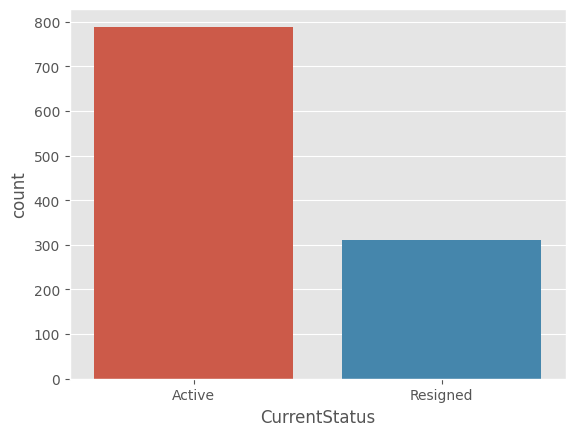

In [62]:
sns.countplot(x='CurrentStatus', data=data)
plt.show()

In [63]:
data["CurrentStatus"].value_counts()
data.CurrentStatus.value_counts(normalize=True)
data.CurrentStatus.value_counts(normalize=True).mul(100).round(3).astype(str) + '%'


Active      71.727%
Resigned    28.273%
Name: CurrentStatus, dtype: object

## 2. Employee Position

### Does employee position affects the attrition

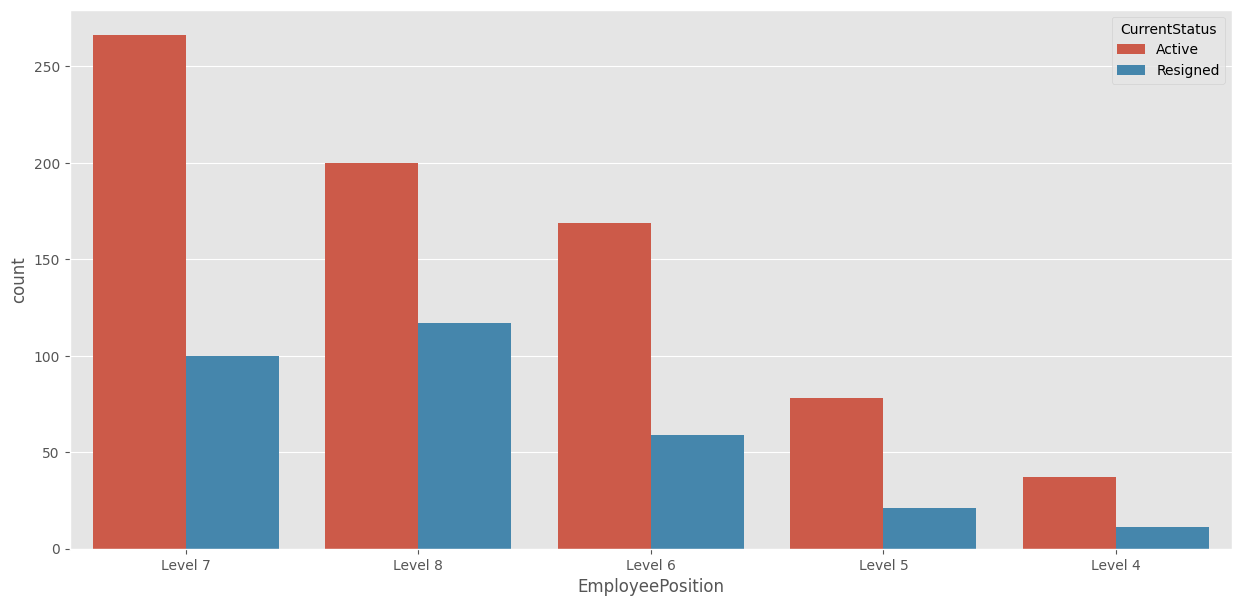

In [64]:
dsa1 = data.EmployeePosition.value_counts().iloc[:5].index

plt.figure(figsize=(15,7))
sns.countplot(x='EmployeePosition', 
              data=data, 
              order=dsa1, 
              hue='CurrentStatus')
plt.show()

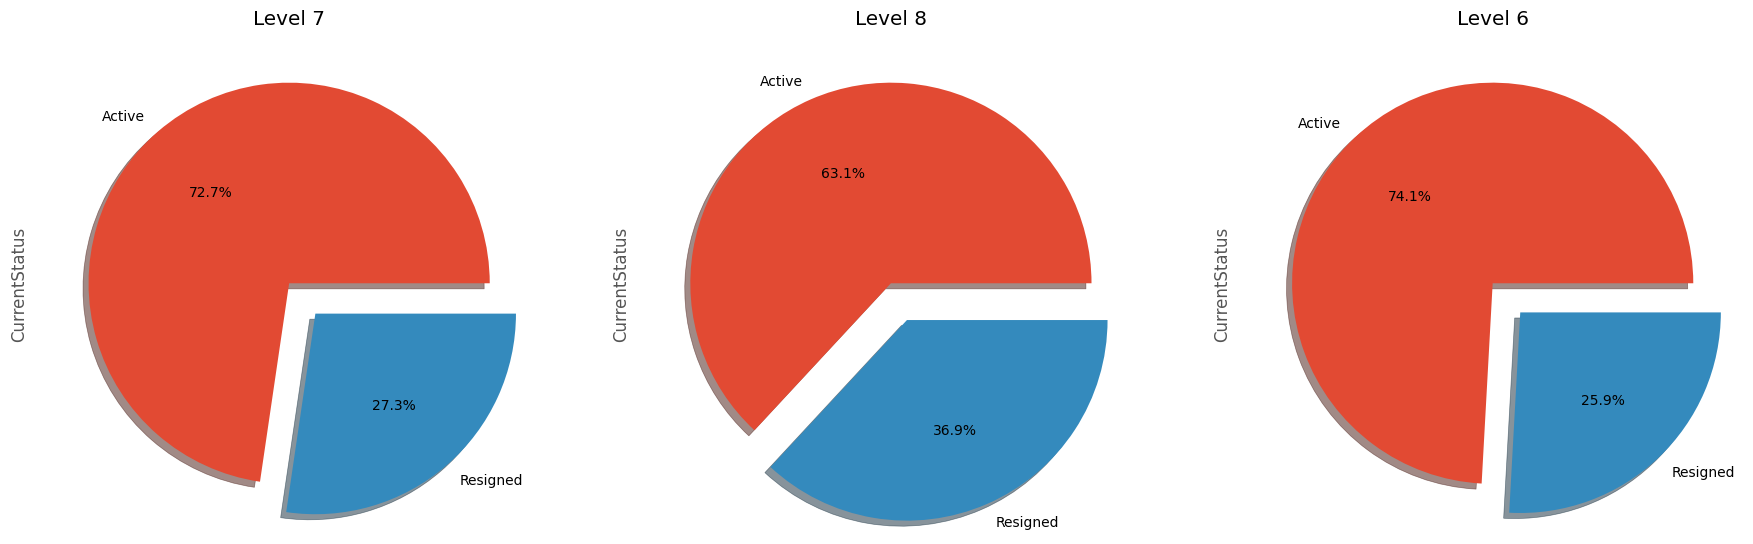

In [65]:
f,ax=plt.subplots(1,3,figsize=(22,7))
data['CurrentStatus'][data['EmployeePosition']=='Level 7'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
data['CurrentStatus'][data['EmployeePosition']=='Level 8'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
data['CurrentStatus'][data['EmployeePosition']=='Level 6'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('Level 7')
ax[1].set_title('Level 8')
ax[2].set_title('Level 6')
plt.show()

Here we can predict that employees who are working at lower level(8 and 7) are mostly like to resign. as they are not getting career growth which they have further mentioned in their reason to leave the company in 3rd datafile

## People Group

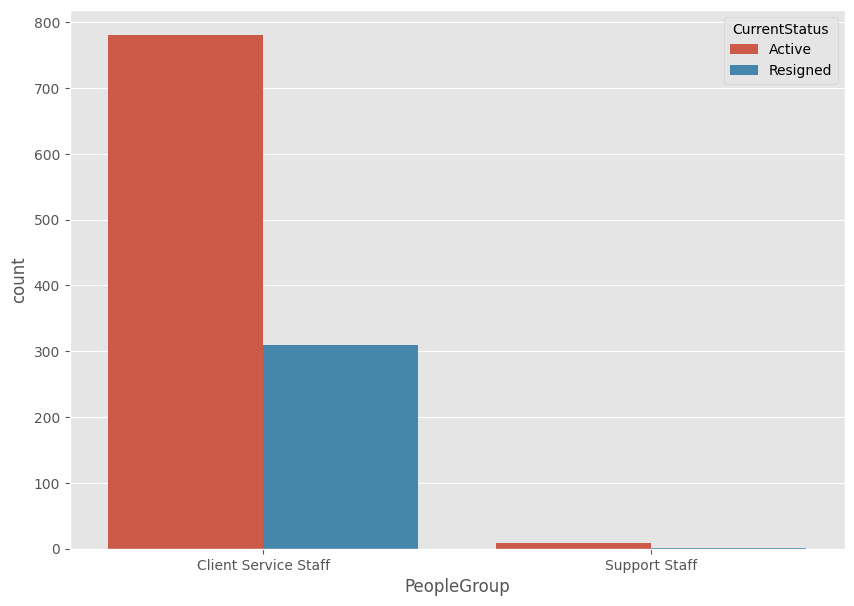

In [66]:
plt.figure(figsize=(10,7))
sns.countplot(x='PeopleGroup', 
              data=data,  
              hue='CurrentStatus')
plt.show()

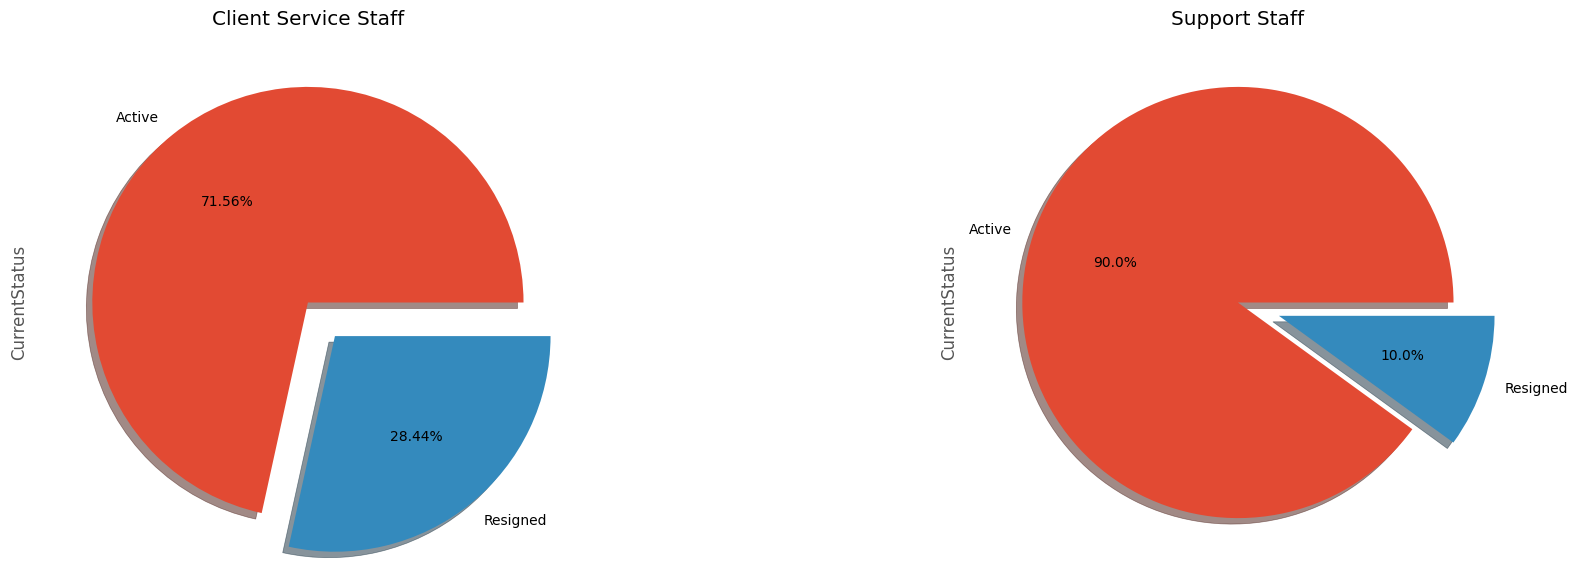

In [67]:
f,ax=plt.subplots(1,2,figsize=(22,7))
data['CurrentStatus'][data['PeopleGroup']=='Client Service Staff'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.2f%%',ax=ax[0],shadow=True)
data['CurrentStatus'][data['PeopleGroup']=='Support Staff'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)

ax[0].set_title('Client Service Staff')
ax[1].set_title('Support Staff')
plt.show()

## 4. Profit Center
### Which "Profit-Center" has the most resigned employees?

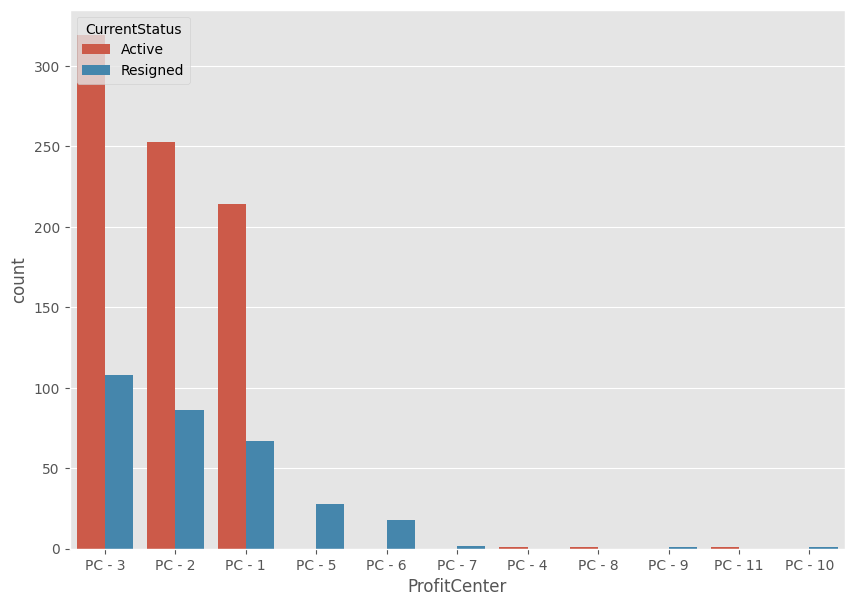

In [68]:
pr5 = data.ProfitCenter.value_counts().iloc[:].index

plt.figure(figsize=(10,7))
sns.countplot(x='ProfitCenter', 
              data=data,
              order=pr5,
              hue='CurrentStatus')
plt.show()

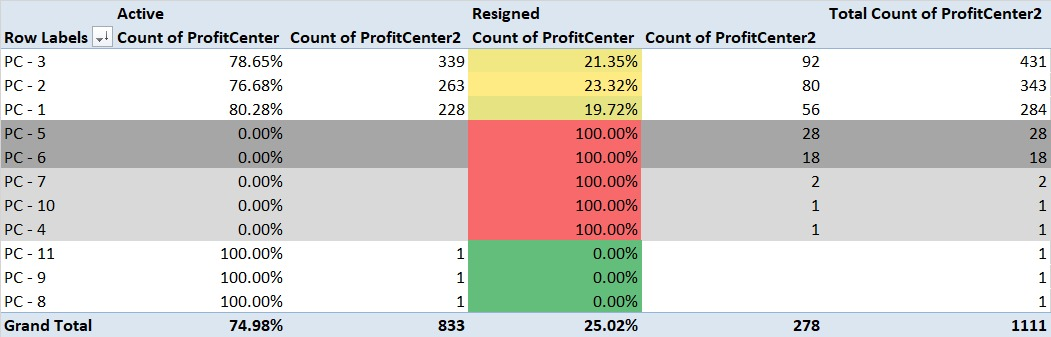

From the above table we can observe that all the employee who worked at office location 5,6,7,10,4 all have resgined.and people who are working at office location 3 and 2 . the attrition rate is higher as we can see that. in pc-3----> 27% employees have resigned in pc-2-----> 30% employees have resigned

## 5. Supervisor Name

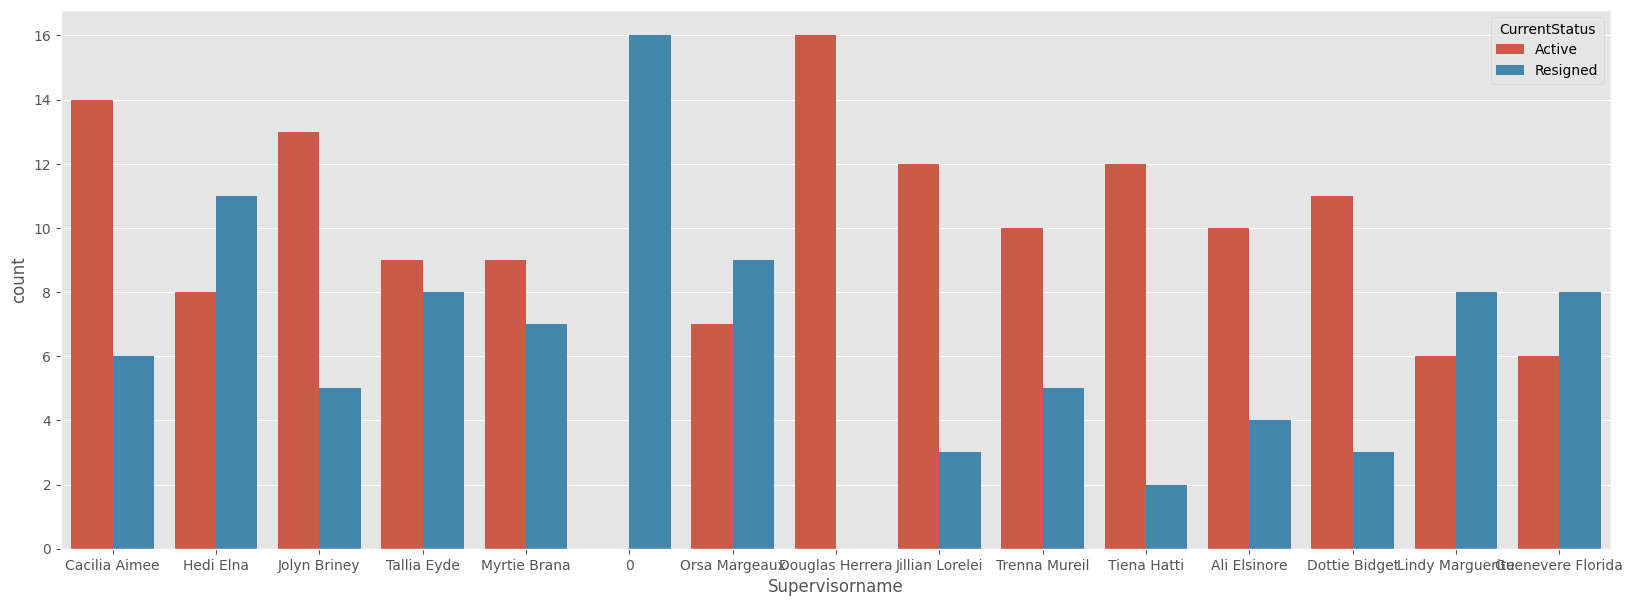

In [69]:
sup1 = data.Supervisorname.value_counts().iloc[:15].index

plt.figure(figsize=(20,7))
sns.countplot(x='Supervisorname',
              order=sup1,
              data=data,
              hue='CurrentStatus')
plt.show()

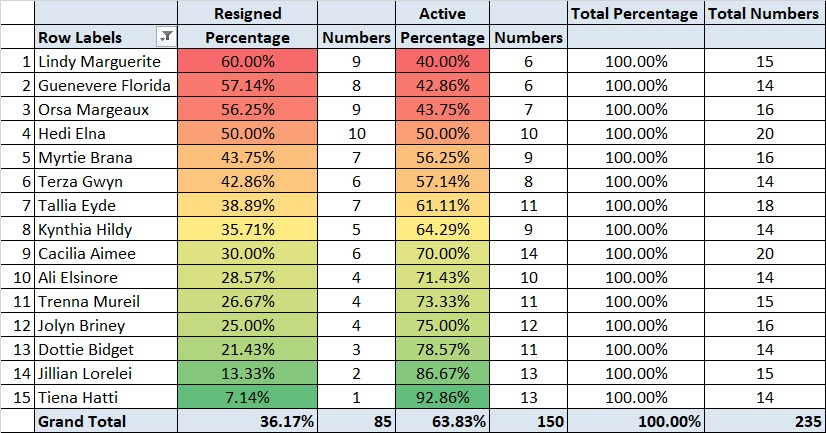

These are the top 15 supervisor under whom supervision, the employees have resigned the most. as you can see, from the above table that for top 5 supervisor. the employees who have resigned are more than the employees who are currently working.

## 6. Employee Location
### Does "Employee Location" affects the attrition?

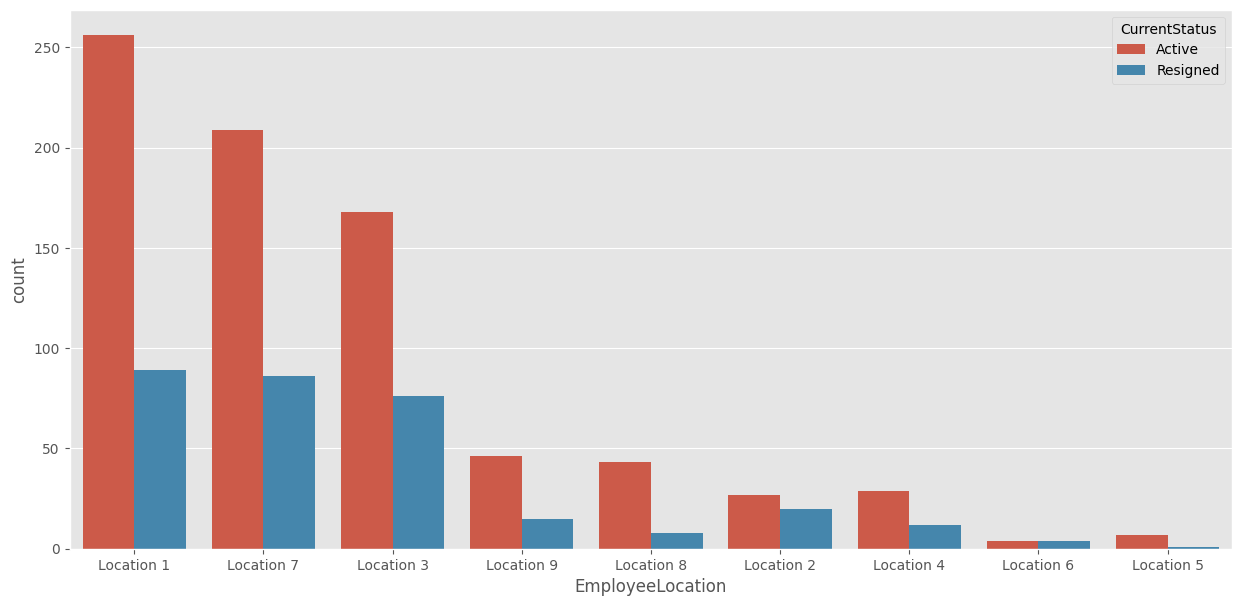

In [70]:
eloc1 = data.EmployeeLocation.value_counts().iloc[:20].index

plt.figure(figsize=(15,7))
sns.countplot(x='EmployeeLocation',
              order=eloc1,
              data=data,
              hue='CurrentStatus')

plt.show()

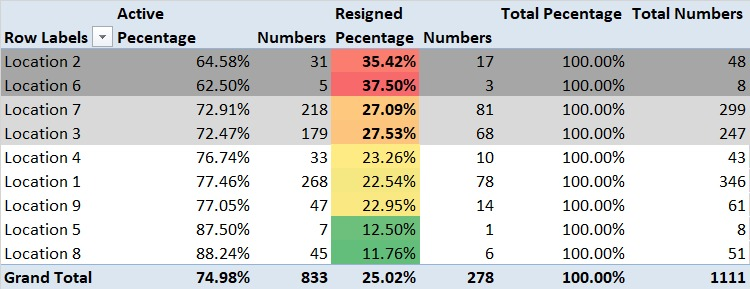

# Feature Selection / Engineering

In [71]:
df = data.copy()

In [72]:
df.head()

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,Supervisorname,JoinDate,CurrentStatus,Utilization%.12,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12
0,1,PC - 1,Rochette Jilleen,Level 1,Location 3,Client Service Staff,Idalina Lauraine,2000-09-30,Active,0.240279,173.333333,155.375000,37.333333,15.666667,2.291667,119.291667,1.500000
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,Idalina Lauraine,1999-05-31,Active,0.386510,173.333333,155.666667,60.166667,17.333333,0.333333,50.041667,49.708333
2,3,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,Idalina Lauraine,2001-01-31,Active,0.681977,173.333333,143.333333,97.750000,28.166667,1.833333,38.625000,29.791667
3,4,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Idalina Lauraine,2000-09-30,Resigned,0.166413,153.333333,136.708333,22.750000,16.333333,0.291667,113.416667,2.000000
4,5,PC - 4,Idalina Lauraine,Level 1,Location 3,Client Service Staff,Abagail Druci,1998-06-30,Active,0.123651,109.333333,100.416667,12.416667,8.666667,0.250000,96.583333,68.166667


In [73]:
# droping Employee no and join date
df.drop(columns= ['EmployeeNo','JoinDate'],inplace=True)

In [74]:
# droping employee name
df.drop(columns= ['EmployeeName'],inplace=True)

## Binarification of People Group

In [75]:
df['PeopleGroup'].value_counts()

Client Service Staff    1090
Support Staff             10
Name: PeopleGroup, dtype: int64

In [76]:
df['PeopleGroup']=df['PeopleGroup'].map({'Support Staff':0,'Client Service Staff':1})

## Binarification of CurrentStatus

In [77]:
df['CurrentStatus'].value_counts()

Active      789
Resigned    311
Name: CurrentStatus, dtype: int64

In [78]:
df['CurrentStatus']=df['CurrentStatus'].map({'Resigned':0,'Active':1})


In [79]:
df.head()

,ProfitCenter,EmployeePosition,EmployeeLocation,PeopleGroup,Supervisorname,CurrentStatus,Utilization%.12,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12
0,PC - 1,Level 1,Location 3,1,Idalina Lauraine,1,0.240279,173.333333,155.375000,37.333333,15.666667,2.291667,119.291667,1.500000
1,PC - 2,Level 2,Location 7,1,Idalina Lauraine,1,0.386510,173.333333,155.666667,60.166667,17.333333,0.333333,50.041667,49.708333
2,PC - 2,Level 2,Location 7,1,Idalina Lauraine,1,0.681977,173.333333,143.333333,97.750000,28.166667,1.833333,38.625000,29.791667
3,PC - 3,Level 2,Location 1,1,Idalina Lauraine,0,0.166413,153.333333,136.708333,22.750000,16.333333,0.291667,113.416667,2.000000
4,PC - 4,Level 1,Location 3,1,Abagail Druci,1,0.123651,109.333333,100.416667,12.416667,8.666667,0.250000,96.583333,68.166667


## Dummies Creation

In [80]:
dummies = pd.get_dummies(df['ProfitCenter'])
dummies.head(2)

,PC - 1,PC - 10,PC - 11,PC - 2,PC - 3,PC - 4,PC - 5,PC - 6,PC - 7,PC - 8,PC - 9
0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0


In [81]:
dummies1 = pd.get_dummies(df['EmployeePosition'])
dummies2 = pd.get_dummies(df['EmployeeLocation'])
dummies3 = pd.get_dummies(df['Supervisorname'])

In [82]:
df = pd.concat([df,dummies,dummies1,dummies2,dummies3],axis='columns')
df.head(3)

,ProfitCenter,EmployeePosition,EmployeeLocation,PeopleGroup,Supervisorname,CurrentStatus,Utilization%.12,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12,PC - 1,PC - 10,PC - 11,PC - 2,PC - 3,PC - 4,PC - 5,PC - 6,PC - 7,PC - 8,PC - 9,Level 1,Level 10,Level 2,Level 3,Level 4,Level 5,Level 6,Level 7,Level 8,Level A1,Level A2,Level A3,Location 1,Location 2,Location 3,Location 4,Location 5,Location 6,Location 7,Location 8,Location 9,0,Abagail Druci,Aeriela Elonore,Agata Theodosia,Agnes Stacie,Ailyn Marie-Ann,Aimil Latisha,Ali Elsinore,Alvinia Ede,Annnora Gabrielle,Ardys Katerine,Audi Stephana,Barbee Joey,Benedikta Kirbee,Bernice Andrea,Beryle Lisha,Beverley Laney,Blair Dinny,Blondy Tatiania,Cacilia Aimee,Cassandra Katerina,Cherise Lainey,Cherry Fancie,Chris Ricky,Christina Desdemona,Claudia Meaghan,Cody Ashlan,Conni Athene,Cordey Sofia,Cordula Devan,Cortney Wanids,Cosette Lavena,Cristina Maren,Cynthia Leonora,Danette Melinda,Dannie Clotilda,Daryl Natalina,Deloris Gabriella,Dionne Ronna,Donette Verne,Dore Natalya,Dorotea Inger,Dottie Bidget,Douglas Herrera,Em Cacilie,Emelda Jackqueline,Erminie Ericka,Eydie Francine,Ezmeralda Nisse,Frances Mignonne,Gavra Kayle,Genvieve Celeste,Gert Editha,Gisella Nickie,Grata Rochella,Guenevere Florida,Hedi Elna,Hedwiga Mehetabel,Idalina Lauraine,Ilsa Marigold,Imelda Madalena,Iormina Lucienne,Irene Candis,Isahella Gwendolin,Jamiya Sellers,Jaylin Berg,Jillana Vivi,Jillian Lorelei,Johan Gaines,Jolyn Briney,Jordanna Danya,Josey Rorie,Josi Ula,Kali Gwendolyn,Kalie Sylvia,Kalindi Toma,Kathye Edna,Kati Rosalyn,Katuscha Pru,Kevin Perez,Kippy Marquita,Klarrisa Theresita,Kristina Alleen,Kynthia Hildy,Laetitia Yoshi,Landon Browning,Lane Ailina,Latosha Bierbaum,Lee Alfie,Leilah Nanni,Lenora Nydia,Leonanie Lexine,Lian Harley,Libbey Rita,Libby Bowen,Lindy Marguerite,Luciana Erika,Madden Galvan,Margo Opaline,Maria Aubrey,Marina Garnette,Marleah Bernadina,Marne Linn,Marney Anderea,Marris Gilda,Marys Essy,Mathilda Tomi,Mira Fiorenze,Misti Helena,Moira Vivien,Morgen Hailee,Myrtie Brana,Nancee Deirdre,Naomi Rebekah,Nerissa Jackquelin,Nerita Anet,Nikolia Shirl,Ophelie Jyoti,Orelee Hanna,Oriana Tabby,Orsa Margeaux,Pamelina Shalna,Philippe Kizzie,Prudi Delly,Refugia Morganti,Revkah Stephie,Rina Debee,Rochette Jilleen,Rosabel Saidee,Rosabella Arlina,Rosalynd Catina,Ruthe Bellina,Sheila Papagena,Sile Lorrie,Stacey Cassey,Sybil Georgianna,Talia Bautista,Tallia Eyde,Tallulah Kassia,Tatiana Roxanna,Terza Gwyn,Tiena Hatti,Tommy Muire,Trenna Mureil,Trudey Lissi,Vanessa Zingaro,Vinni Calypso,Vonni Bethena,Willette Lil,Xylina Beatriz,Yolanthe Laurella,Zaneta Arlette,Zaria Dawn
0,PC - 1,Level 1,Location 3,1,Idalina Lauraine,1,0.240279,173.333333,155.375000,37.333333,15.666667,2.291667,119.291667,1.500000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,PC - 2,Level 2,Location 7,1,Idalina Lauraine,1,0.386510,173.333333,155.666667,60.166667,17.333333,0.333333,50.041667,49.708333,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,PC - 2,Level 2,Location 7,1,Idalina Lauraine,1,0.681977,173.333333,143.333333,97.750000,28.166667,1.833333,38.625000,29.791667,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

In [83]:
df.shape

(1100, 199)

In [84]:
df.drop(columns=["ProfitCenter","EmployeePosition","EmployeeLocation","Supervisorname"],inplace=True)

In [85]:
df.shape

(1100, 195)

In [86]:
inputs = df.drop(columns=['CurrentStatus'])
target = df['CurrentStatus']

In [87]:
from sklearn.model_selection import train_test_split

In [114]:
x_train, x_test, y_train, y_test = train_test_split(inputs,target,train_size=0.80,random_state=2)

In [115]:
print(x_train.shape, y_train.shape)
print('_'*30)
print(x_test.shape, y_test.shape)

(880, 194) (880,)
______________________________
(220, 194) (220,)


In [116]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score,f1_score

In [117]:
# Validation
def validation(name,model,y_test):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    
    df = pd.DataFrame({'Accuracy': accuracy_score(y_test, pred), 'Recall': recall_score(y_test,pred), 
                       'Precision': precision_score(y_test,pred),
                       'F1_Score': f1_score(y_test, pred)},index=[name])
    
    return df

In [118]:
def report(model, y_test):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    
    print(confusion_matrix(y_test,pred))
    print('*'*50)
    
    return print(classification_report(y_test,pred))

## Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
model_lr= LogisticRegression()

In [121]:
report(model_lr, y_test)

[[ 50  17]
 [  6 147]]
**************************************************
              precision    recall  f1-score   support

           0       0.89      0.75      0.81        67
           1       0.90      0.96      0.93       153

    accuracy                           0.90       220
   macro avg       0.89      0.85      0.87       220
weighted avg       0.90      0.90      0.89       220



In [122]:
lr = validation('Logistic Regression', model_lr, y_test)
lr

,Accuracy,Recall,Precision,F1_Score
Logistic Regression,0.895455,0.960784,0.896341,0.927445


# Naive Bayes

In [111]:
from sklearn.naive_bayes import GaussianNB

In [112]:
model_gnb = GaussianNB()

In [113]:
report(model_gnb, y_test)

[[36 11]
 [64 54]]
**************************************************
              precision    recall  f1-score   support

           0       0.36      0.77      0.49        47
           1       0.83      0.46      0.59       118

    accuracy                           0.55       165
   macro avg       0.60      0.61      0.54       165
weighted avg       0.70      0.55      0.56       165



In [124]:
gnb = validation('GaussianNB', model_gnb, y_test)
gnb

,Accuracy,Recall,Precision,F1_Score
GaussianNB,0.595455,0.490196,0.872093,0.627615


## Random Forest

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
model_rf = RandomForestClassifier()

In [128]:
report(model_rf,y_test)

[[ 60   7]
 [  5 148]]
**************************************************
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        67
           1       0.95      0.97      0.96       153

    accuracy                           0.95       220
   macro avg       0.94      0.93      0.94       220
weighted avg       0.95      0.95      0.95       220



In [130]:
rf = validation('Random Forest', model_rf, y_test)
rf

,Accuracy,Recall,Precision,F1_Score
Random Forest,0.940909,0.96732,0.948718,0.957929


## SVC

In [131]:
from sklearn.svm import SVC

In [132]:
model_svc = SVC()

In [133]:
report(model_svc, y_test)

[[ 21  46]
 [  4 149]]
**************************************************
              precision    recall  f1-score   support

           0       0.84      0.31      0.46        67
           1       0.76      0.97      0.86       153

    accuracy                           0.77       220
   macro avg       0.80      0.64      0.66       220
weighted avg       0.79      0.77      0.73       220



In [135]:
svc = validation('SVC', model_svc, y_test)
svc

,Accuracy,Recall,Precision,F1_Score
SVC,0.772727,0.973856,0.764103,0.856322


In [136]:
models = pd.concat([lr, gnb, rf, svc])
models

,Accuracy,Recall,Precision,F1_Score
Logistic Regression,0.895455,0.960784,0.896341,0.927445
GaussianNB,0.595455,0.490196,0.872093,0.627615
Random Forest,0.940909,0.967320,0.948718,0.957929
SVC,0.772727,0.973856,0.764103,0.856322
